In [1]:
# ייבוא ספריות והגדרות מסודרות לעבודה שלי של חן ורעות
# לא לגעת בזה 
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt



"""
 כללי עבודה:
1. כל פקודה תעובד בנפרד בשלב הראשון, כך נוכל לבדוק אם יש שגיאות בודדות ולטפל בהן.
2. בסוף, אחרי שכל הפקודות נבדקו והן פועלות בצורה תקינה, נריץ את כל הפקודות יחד.
# זה חשוב לוודא שהקוד עובד כמו שצריך ולמנוע בעיות לא צפויות בריצה הגדולה
"""

"""
מה הספקנו עד עכשיו:
1. הגדרת נתיב לשאיבת הנתונים של הקובץ המקורי
2. ניקוי כל השורות האחרונות והמיותרות
3. בדיקה של ערכים חסרים בכל עמודה
"""

"""
תכונות מעניינות שלמדנו:
1. במידה ושמים נקודה פסיק  בסוף פקודה היא לא תרוץ
2. קיצור להרצת הקוד - שיפט ואנטר ביחד
3. קיצור לצפייה בהוראות הפקודה - שיפט וטאב ביחד
"""



'\nתכונות מעניינות שלמדנו:\n1. במידה ושמים נקודה פסיק  בסוף פקודה היא לא תרוץ\n2. קיצור להרצת הקוד - שיפט ואנטר ביחד\n3. קיצור לצפייה בהוראות הפקודה - שיפט וטאב ביחד\n'

In [2]:
# ייבוא נתונים מהקובת המקורי - רן

# קביעת הנתיב של תיקיית העבודה הנוכחית
project_root = os.getcwd()
# הגדרת הנתיב היחסי לקובץ Excel בתיקיית Original_Source
input_file = os.path.join(project_root, "Original_Source", "DEIDאשפוזים פרטים דומגרפיים.xlsx")

# טעינת הקובץ לפנדס
df = pd.read_excel(input_file)

# הצגת חמש השורות הראשונות של הנתונים
print(df.head())


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\hadma\\Desktop\\git\\DataFinalProjectDegree\\final_project\\Statistical tests_Updates\\Original_Source\\DEIDאשפוזים פרטים דומגרפיים.xlsx'

In [4]:
# ניקוי שורות לא רלוונטיות
# חן רעות אל תגעו זה תוקן בוודאות 100 אחוז חתום נעולללללללללללללללללללללללללללללללללללללללללללללללללללללללללללללללללללללללללללללללללללללל
# הגדרת הנתיב לתיקיית Excel_Updates\Update 1 - Deleting Empty Rows at the End
output_dir = os.path.join(project_root, "Excel_Updates", "Update 1 - Deleting Empty Rows at the End")

# הגדרת הנתיב המלא לשם הקובץ
output_file = os.path.join(output_dir, "cleaned_hospital_data_up_to_17567_Test.xlsx")

# ניקוי שורות לא רלוונטיות - כל השורות עד 17566 כולל
df_cleaned = df.iloc[:17567]  # כל השורות עד השורה ה-17,567 (כולל)

# שמירת הקובץ
df_cleaned.to_excel(output_file, index=False)

print(f"קובץ חדש נשמר בנתיב: {output_file}")
print(f"סה\"כ נשמרו {len(df_cleaned)} שורות.")


קובץ חדש נשמר בנתיב: C:\Users\User\Desktop\DataFinalProjectDegree\final_project\Excel_Updates\Update 1 - Deleting Empty Rows at the End\cleaned_hospital_data_up_to_17567_Test.xlsx
סה"כ נשמרו 17567 שורות.


In [5]:
#רעות 12/12- בדיקה לשורות כפולות ומחיקתן 

# הגדרת הנתיב היחסי לתיקיית Excel_Updates\Update 1 - Deleting Empty Rows at the End
input_file = os.path.join(project_root, "Excel_Updates", "Update 1 - Deleting Empty Rows at the End", "cleaned_hospital_data_up_to_17567_Test.xlsx")
output_file = os.path.join(project_root, "Excel_Updates", "Update 2 - Removing Duplicate Rows and Saving Duplicates to a Separate File", "cleaned_hospital_data_no_duplicates.xlsx")
removed_rows_file = os.path.join(project_root, "Excel_Updates", "Update 2 - Removing Duplicate Rows and Saving Duplicates to a Separate File", "removed_duplicate_rows.xlsx")

# קריאת הקובץ שנוצר לאחר מחיקת השורות הלא רלוונטיות
df = pd.read_excel(input_file)

# ניקוי רווחים מיותרים מכל התאים
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# יצירת DataFrame לאיתור כפילויות
duplicates = df[df.duplicated(keep='first')]  # שמירה רק על השורות הכפולות, לא הראשונה

# הצגת הכפילויות
print("שורות כפולות שנמצאו:")
print(duplicates)

# איתור ההתאמה בין השורות הכפולות לשורות הראשונות הזהות להן
mapping = {}
for index, row in duplicates.iterrows():
    for original_index, original_row in df[df.index < index].iterrows():
        if row.equals(original_row):
            mapping[index] = original_index
            break

# תיעוד מספרי השורות שהוסרו ומדוע
if mapping:
    print("שורות שנמחקו וההתאמה שלהן לשורות קיימות:")
    for removed_index, matched_index in mapping.items():
        print(f"שורה {removed_index} נמחקה כי היא זהה לשורה {matched_index}")
else:
    print("לא נמצאו שורות כפולות למחיקה.")

# מחיקת השורות הכפולות
df_cleaned = df.drop_duplicates()

# שמירת הקובץ הנקי לאחר מחיקת הכפולות
df_cleaned.to_excel(output_file, index=False)

# שמירת שורות שהוסרו (כפולות) לקובץ נפרד
duplicates.to_excel(removed_rows_file, index=False)

print(f"הקובץ הנקי (ללא כפילויות) נשמר ב-{output_file}.")
print(f"שורות שהוסרו נשמרו ב-{removed_rows_file}.")
print(f"סה\"כ {len(duplicates)} שורות נמחקו.")






C:\Users\User\AppData\Local\Temp\ipykernel_7004\3333434436.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


שורות כפולות שנמצאו:
Empty DataFrame
Columns: [מספר מטופל רנדומלי, מספר מקרה אשפוז רנדומלי, תאריך פטירה, ארץ לידה, מגדר, תאריך לידה, תאריך עליה, מצב משפחתי, מספר ילדים, גורם מפנה, סיבת קבלה, תאריך ושעת כניסה למחלקה, תאריך ושעת יציאה מהמחלקה, יחידה רפואית - אשפוז, ימי אשפוז ברוטו, סטטוס חוקי - אשפוז, סיבת שחרור, הופנה ל]
Index: []
לא נמצאו שורות כפולות למחיקה.


PermissionError: [Errno 13] Permission denied: 'C:\\Users\\User\\Desktop\\DataFinalProjectDegree\\final_project\\Excel_Updates\\Update 2 - Removing Duplicate Rows and Saving Duplicates to a Separate File\\cleaned_hospital_data_no_duplicates.xlsx'

In [ ]:
#בדיקה לשכפול מטופלים שהימי אשפוז/סטטוס אשפוז שונים - רעות 12/12

# יצירת נתיב לקובץ הקלט (cleaned_hospital_data_no_duplicates.xlsx)
input_file = os.path.join(project_root, "Excel_Updates", "Update 2 - Removing Duplicate Rows and Saving Duplicates to a Separate File", "cleaned_hospital_data_no_duplicates.xlsx")

# קריאת הקובץ
df = pd.read_excel(input_file)

# העמודות להשוואה
columns_to_compare = [
    'מספר מטופל רנדומלי',
    'מספר מקרה אשפוז רנדומלי',
    'תאריך ושעת כניסה למחלקה',
    'תאריך ושעת יציאה מהמחלקה'
]

# בדיקה אם העמודות קיימות בקובץ
missing_columns = [col for col in columns_to_compare if col not in df.columns]
if missing_columns:
    print(f"עמודות חסרות בקובץ: {missing_columns}")
else:
    print("כל העמודות להשוואה קיימות בקובץ.")

# בדיקת ערכים זהים עבור העמודות שנבחרו
df_duplicates = df[df.duplicated(subset=columns_to_compare, keep=False)]

if not df_duplicates.empty:
    print(f"נמצאו {len(df_duplicates)} שורות שבהן הערכים זהים בעמודות: {columns_to_compare}")
    
    # יצירת נתיב לקובץ שבו יישמרו השורות הכפולות
    duplicates_file = os.path.join(project_root, "Excel_Updates", "Update 3 - Checking Patients with Different Hospitalization Days or Status", "duplicate_rows.xlsx")
    
    # שמירת השורות הכפולות בקובץ
    df_duplicates.to_excel(duplicates_file, index=False)
    print(f"שורות כפולות נשמרו בקובץ: {duplicates_file}")
    
    # הצגת המספרים הרנדומליים של המטופלים שנמצאו
    unique_patients = df_duplicates['מספר מטופל רנדומלי'].unique()
    print("מספרי המטופלים הרנדומליים שנמצאו:")
    for patient_id in unique_patients:
        print(patient_id)
else:
    print("לא נמצאו שורות שבהן הערכים זהים בכל העמודות שנבדקו.")

# זיהוי עמודות אחרות בקובץ שאינן נכללות בבדיקה
additional_columns = [col for col in df.columns if col not in columns_to_compare]
print(f"עמודות אחרות בקובץ שאינן נבדקות: {additional_columns}")


In [ ]:
##ר- המרת 'מגדר' לדומנים ודריסת הערך הראשון

# הגדרת הנתיב של הקובץ
input_file = os.path.join(project_root, "Excel_Updates", "Update 2 - Removing Duplicate Rows and Saving Duplicates to a Separate File", "cleaned_hospital_data_no_duplicates.xlsx")
print(f"קריאת הקובץ מ: {input_file}")

# קריאת הקובץ
df = pd.read_excel(input_file)

# בדיקה אם עמודת 'מגדר' קיימת
if 'מגדר' in df.columns:
    # המרת 'מגדר' לדומנים ודריסת הערך הראשון
    df_gender_dummies = pd.get_dummies(df['מגדר'], drop_first=True).astype(int)

    # קבלת שם העמודה החדשה (לדוגמה: 'נקבה')
    new_column_name = df_gender_dummies.columns[0]

    # מציאת אינדקס העמודה 'מגדר'
    gender_index = df.columns.get_loc('מגדר')

    # הסרת עמודת 'מגדר' והכנסת העמודה החדשה באותו מיקום
    df = df.drop(columns=['מגדר'])
    df.insert(gender_index, new_column_name, df_gender_dummies[new_column_name])

    print("עמודת 'מגדר' הוחלפה בעמודת הדומיין החדשה בהצלחה.")

    # שמירת הקובץ המעודכן
    output_file = os.path.join(project_root, "Excel_Updates", "Update 4 - Dummies for Gender", "cleaned_hospital_data_updated.xlsx")
    df.to_excel(output_file, index=False)
    print(f"הקובץ המעודכן נשמר בנתיב: {output_file}")
else:
    print("עמודת 'מגדר' לא נמצאה בקובץ.")


In [23]:
#הוספת עמודה של גיל המטופל ברגע האשפוז - רעות 12/12 
import pandas as pd

# נתיב הקובץ
input_file = os.path.join(project_root, "Excel_Updates", "Update 4 - Dummies for Gender", "cleaned_hospital_data_updated.xlsx")

# קריאת הקובץ
df = pd.read_excel(input_file)

# בדיקה אם העמודות קיימות
required_columns = ['תאריך ושעת כניסה למחלקה', 'תאריך לידה']
missing_columns = [col for col in required_columns if col not in df.columns]

if missing_columns:
    print(f"עמודות חסרות בקובץ: {missing_columns}")
else:
    # המרת העמודות לפורמט תאריך
    df['תאריך ושעת כניסה למחלקה'] = pd.to_datetime(df['תאריך ושעת כניסה למחלקה'], errors='coerce')
    df['תאריך לידה'] = pd.to_datetime(df['תאריך לידה'], errors='coerce')

    # חישוב גיל אשפוז
    df['גיל אשפוז'] = (df['תאריך ושעת כניסה למחלקה'] - df['תאריך לידה']).dt.days // 365

    # שמירת הקובץ המעודכן
    output_file = os.path.join(project_root, "Excel_Updates", "Update 5 - Correcting Patient Age Column", "cleaned_hospital_data_with_age.xlsx") 
    df.to_excel(output_file, index=False)
    print("עמודת 'גיל אשפוז' נוספה בהצלחה.")
    print(f"הקובץ המעודכן נשמר בנתיב: {output_file}")


עמודת 'גיל אשפוז' נוספה בהצלחה.
הקובץ המעודכן נשמר בנתיב: C:\Users\hadma\Desktop\git\DataFinalProjectDegree\final_project\Excel_Updates\Update 5 - Correcting Patient Age Column\cleaned_hospital_data_with_age.xlsx


In [24]:

# חן- בדיקה שהתאריכים נכונים
# נתיב הקובץ המקורי
input_file = os.path.join(project_root, "Excel_Updates", "Update 5 - Correcting Patient Age Column", "cleaned_hospital_data_with_age.xlsx") 

# קריאת הקובץ
df = pd.read_excel(input_file)

# המרת העמודות לפורמט תאריך ושעה
df['תאריך ושעת יציאה מהמחלקה'] = pd.to_datetime(df['תאריך ושעת יציאה מהמחלקה'], errors='coerce')
df['תאריך ושעת כניסה למחלקה'] = pd.to_datetime(df['תאריך ושעת כניסה למחלקה'], errors='coerce')
df['תאריך לידה'] = pd.to_datetime(df['תאריך לידה'], errors='coerce')

# זיהוי שורות עם שגיאה בתאריכי יציאה וכניסה
invalid_exit_rows = df[df['תאריך ושעת יציאה מהמחלקה'] <= df['תאריך ושעת כניסה למחלקה']]
#מחיקת השורות האלו-לאחר וידוא עם אסתר מדובר במטופלים שלא נשארו לאשפוז

# זיהוי שורות עם שגיאה בתאריך לידה מול תאריך ושעת כניסה למחלקה
invalid_birth_to_entry_rows = df[df['תאריך לידה'] > df['תאריך ושעת כניסה למחלקה']]

# זיהוי שורות עם שגיאה בתאריך לידה מול תאריך ושעת יציאה מהמחלקה
invalid_birth_to_exit_rows = df[df['תאריך לידה'] > df['תאריך ושעת יציאה מהמחלקה']]

# הדפסת סיכום
print(f"נמצאו {len(invalid_exit_rows)} שורות עם שגיאה בתאריכי יציאה וכניסה.")
print(f"נמצאו {len(invalid_birth_to_entry_rows)} שורות שבהן תאריך לידה מאוחר מתאריך כניסה למחלקה.")
print(f"נמצאו {len(invalid_birth_to_exit_rows)} שורות שבהן תאריך לידה מאוחר מתאריך יציאה מהמחלקה.")

# שמירת השורות הלא תקינות לקבצי Excel לבדיקה
if not invalid_exit_rows.empty:

    invalid_exit_rows_file = os.path.join(project_root, "Excel_Updates", "Update 6 - Checking Date Columns", "invalid_exit_rows.xlsx") 
    invalid_exit_rows.to_excel(invalid_exit_rows_file, index=False)
    print(f"שורות עם שגיאה בתאריכי יציאה וכניסה נשמרו ב-{invalid_exit_rows_file}.")

if not invalid_birth_to_entry_rows.empty:
    invalid_birth_to_entry_rows_file =  os.path.join(project_root, "Excel_Updates", "Update 6 - Checking Date Columns", "invalid_birth_to_entry_rows.xlsx") 
    invalid_birth_to_entry_rows.to_excel(invalid_birth_to_entry_rows_file, index=False)
    print(f"שורות עם תאריך לידה מאוחר מתאריך כניסה נשמרו ב-{invalid_birth_to_entry_rows_file}.")

if not invalid_birth_to_exit_rows.empty:
    invalid_birth_to_exit_rows_file = os.path.join(project_root, "Excel_Updates", "Update 6 - Checking Date Columns", "invalid_birth_to_exit_rows.xlsx") 
    invalid_birth_to_exit_rows.to_excel(invalid_birth_to_exit_rows_file, index=False)
    print(f"שורות עם תאריך לידה מאוחר מתאריך יציאה נשמרו ב-{invalid_birth_to_exit_rows_file}.")

# יצירת DataFrame חדש ללא השורות הלא תקינות
valid_rows = df[
    ~df.index.isin(invalid_exit_rows.index) &
    ~df.index.isin(invalid_birth_to_entry_rows.index) &
    ~df.index.isin(invalid_birth_to_exit_rows.index)
]

# שמירת הקובץ החדש עם הנתונים התקינים
output_file = os.path.join(project_root, "Excel_Updates", "Update 6 - Checking Date Columns", "cleaned_hospital_data_valid.xlsx") 
valid_rows.to_excel(output_file, index=False)

print(f"הקובץ המעודכן נשמר בנתיב: {output_file}")


נמצאו 102 שורות עם שגיאה בתאריכי יציאה וכניסה.
נמצאו 0 שורות שבהן תאריך לידה מאוחר מתאריך כניסה למחלקה.
נמצאו 0 שורות שבהן תאריך לידה מאוחר מתאריך יציאה מהמחלקה.
שורות עם שגיאה בתאריכי יציאה וכניסה נשמרו ב-C:\Users\hadma\Desktop\git\DataFinalProjectDegree\final_project\Excel_Updates\Update 6 - Checking Date Columns\invalid_exit_rows.xlsx.
הקובץ המעודכן נשמר בנתיב: C:\Users\hadma\Desktop\git\DataFinalProjectDegree\final_project\Excel_Updates\Update 6 - Checking Date Columns\cleaned_hospital_data_valid.xlsx


In [26]:
# .חן - המרת תאריכים בפורמט נכון (תאריך שחרור מהמחלקה לא נכון אומר על מתאשפזים נוכחיים)

# נתיב הקובץ המקורי
input_file =  os.path.join(project_root, "Excel_Updates", "Update 6 - Checking Date Columns", "cleaned_hospital_data_valid.xlsx") 

# קריאת הקובץ
df = pd.read_excel(input_file)

# פונקציה כללית להמרת עמודות תאריך ובדיקה
def validate_date_column(df, column_name, output_file):
    # המרת העמודה לפורמט datetime
    df[column_name] = pd.to_datetime(df[column_name], format='%m/%d/%Y', errors='coerce')
    
    # זיהוי תאריכים לא חוקיים
    invalid_dates = df[
        (df[column_name].isna()) |  # תאריכים שלא ניתן להמיר לפורמט תקני
        (df[column_name] > pd.Timestamp.now()) |  # תאריכים בעתיד
        (df[column_name] < pd.Timestamp('1900-01-01'))  # תאריכים לפני 1900
    ]
    
    # הדפסת סיכום
    invalid_count = invalid_dates.shape[0]
    print(f"מספר השורות עם תאריכים לא חוקיים בעמודה '{column_name}': {invalid_count}")
    
    if invalid_count > 0:
        # שמירת השורות עם תאריכים לא חוקיים לקובץ נפרד
        invalid_dates.to_excel(output_file, index=False)
        print(f"שורות עם תאריכים לא חוקיים נשמרו לקובץ: {output_file}")
    return df

# עיבוד עמודות התאריכיםinvalid_hospitalization_dates.xlsx'
df = validate_date_column(df, 'תאריך ושעת יציאה מהמחלקה', os.path.join(project_root, "Excel_Updates", "Update 6 - Checking Date Columns", "cleaned_hospital_data_updated.xlsx") )
df = validate_date_column(df, 'תאריך ושעת כניסה למחלקה',  os.path.join(project_root, "Excel_Updates", "Update 6 - Checking Date Columns", "invalid_hospitalization_dates.xlsx") )
df = validate_date_column(df, 'תאריך לידה', os.path.join(project_root, "Excel_Updates", "Update 6 - Checking Date Columns", "invalid_birth_dates.xlsx") )

# שמירת הקובץ החדש עם הנתונים המעודכנים
output_file =  os.path.join(project_root, "Excel_Updates", "Update 6 - Checking Date Columns", "cleaned_hospital_data_updated.xlsx") 
df.to_excel(output_file, index=False)
print(f"הקובץ המעודכן נשמר בנתיב: {output_file}")


מספר השורות עם תאריכים לא חוקיים בעמודה 'תאריך ושעת יציאה מהמחלקה': 304
שורות עם תאריכים לא חוקיים נשמרו לקובץ: C:\Users\hadma\Desktop\git\DataFinalProjectDegree\final_project\Excel_Updates\Update 6 - Checking Date Columns\cleaned_hospital_data_updated.xlsx
מספר השורות עם תאריכים לא חוקיים בעמודה 'תאריך ושעת כניסה למחלקה': 0
מספר השורות עם תאריכים לא חוקיים בעמודה 'תאריך לידה': 0
הקובץ המעודכן נשמר בנתיב: C:\Users\hadma\Desktop\git\DataFinalProjectDegree\final_project\Excel_Updates\Update 6 - Checking Date Columns\cleaned_hospital_data_updated.xlsx


In [20]:

# נתיב הקובץ המקורי
input_file =  os.path.join(project_root, "Excel_Updates", "Update 6 - Checking Date Columns", "cleaned_hospital_data_valid.xlsx") 

# קריאת הקובץ
df = pd.read_excel(input_file)

# מיפוי מעודכן של ארצות לאזור מוצא כולל איחודים
country_to_region = {
    # ישראל
    'ישראל': 'ישראל',
    'אתיופיה': 'אתיופיה',

    # ברית המועצות
    'ברית-המועצות': 'ברית המועצות',
    'אוקראינה': 'ברית המועצות',
    'רוסיה': 'ברית המועצות',
    'אוזבקיסטן': 'ברית המועצות',
    'אזרבייג\'אן': 'ברית המועצות',
    'גרוזיה': 'ברית המועצות',
    'הפדרציה הרוסית': 'ברית המועצות',
    'טורקמניסטן': 'ברית המועצות',
    'טג\'יקיסטן': 'ברית המועצות',
    'מולדביה': 'ברית המועצות',
    'לטביה': 'ברית המועצות',
    'ליטא': 'ברית המועצות',
    'רוסיה הלבנה': 'ברית המועצות',
    'קירגיזסטן': 'ברית המועצות',
    'קזחסטן': 'ברית המועצות',

    # צפון אפריקה והמזרח התיכון - מאוחד לאפריקה
    'מצרים': 'אפריקה',
    'איראן': 'אפריקה',
    'מרוקו': 'אפריקה',
    'טוניס': 'אפריקה',
    'אלג\'יריה': 'אפריקה',
    'אריתראה': 'אפריקה',
    'לוב': 'אפריקה',
    'אפגאניסטן': 'אפריקה',
    'פקיסטן': 'אפריקה',
    'תימן': 'אפריקה',

    # אפריקה - מאוחד לאפריקה
    'דרום אפריקה': 'אפריקה',
    'סודן': 'אפריקה',
    'זמביה': 'אפריקה',
    'ליבריה': 'אפריקה',

    # מזרח רחוק
    'יפן': 'מזרח רחוק',
    'סין': 'מזרח רחוק',
    'קוריאה': 'מזרח רחוק',

    # מערב אסיה
    'טורקיה': 'מערב אסיה',

    # מזרח אירופה + מערב אירופה -> אירופה
    'פולין': 'אירופה',
    'רומניה': 'אירופה',
    'צרפת': 'אירופה',
    'בריטניה': 'אירופה',
    'גרמניה': 'אירופה',

    # צפון אמריקה + דרום אמריקה -> אמריקה
    'ארה"ב': 'אמריקה',
    'קנדה': 'אמריקה',
    'ברזיל': 'אמריקה',
    'ארגנטינה': 'אמריקה',

    # לא קיים
    'לא קיים': 'לא קיים',
}

# הוספת העמודה "איזור מוצא"
df['איזור מוצא'] = df['ארץ לידה'].map(country_to_region)

# הדפסת טבלה מסכמת לפי קטגוריות
print(df['איזור מוצא'].value_counts())

# שמירת הטבלה המעודכנת לקובץ חדש
output_file = os.path.join(project_root, "Excel_Updates", "Update 7 - Division by Continents", "updated_countries_with_continents.xlsx") 
df.to_excel(output_file, index=False)

print(f"הטבלה נשמרה לקובץ: {output_file}")


איזור מוצא
ישראל           12258
ברית המועצות     2167
אתיופיה          1196
אירופה            549
אפריקה            506
אמריקה            314
לא קיים           115
מזרח רחוק           2
Name: count, dtype: int64
הטבלה נשמרה לקובץ: C:\Users\hadma\Desktop\git\DataFinalProjectDegree\final_project\Excel_Updates\Update 7 - Division by Continents\updated_countries_with_continents.xlsx


In [44]:
# חן - 
# זיהוי ושמירה של שורות שבהן עמודת "תאריך פטירה" אינה ריקה לקובץ אקסל חדש.


# נתיב הקובץ המקורי
input_file = os.path.join(project_root, "Excel_Updates", "Update 7 - Division by Continents", "updated_countries_with_continents.xlsx") 

# קריאת הקובץ
df = pd.read_excel(input_file)

# זיהוי שורות שבהן עמודת תאריך פטירה אינה ריקה
non_empty_death_date_rows = df[df['תאריך פטירה'].notna()]

# שמירת השורות לקובץ אקסל חדש
output_file = os.path.join(project_root, "Excel_Updates", "Update 8 - Identifying Non-Empty Death Dates", "non_empty_death_date_rows.xlsx") 
non_empty_death_date_rows.to_excel(output_file, index=False)

# הדפסת סיכום
print(f"נמצאו {len(non_empty_death_date_rows)} שורות שבהן עמודת תאריך פטירה אינה ריקה.")
print(f"השורות נשמרו בקובץ {output_file}.")


נמצאו 793 שורות שבהן עמודת תאריך פטירה אינה ריקה.
השורות נשמרו בקובץ C:\Users\hadma\Desktop\git\DataFinalProjectDegree\final_project\Excel_Updates\Update 8 - Identifying Non-Empty Death Dates\non_empty_death_date_rows.xlsx.


In [45]:
# מוצא את תאריך ושעת היציאה המאוחרים ביותר עבור כל מטופל שנפטר, מסיר את השורות הללו מהנתונים ושומר את הטבלה המעודכנת בקובץ חדש.


# נתיב הקובץ המקורי
input_file = os.path.join(project_root, "Excel_Updates", "Update 7 - Division by Continents", "updated_countries_with_continents.xlsx") 

# קריאת הקובץ
df = pd.read_excel(input_file)

# המרת העמודות הרלוונטיות לפורמט תאריך ושעה
df['תאריך ושעת יציאה מהמחלקה'] = pd.to_datetime(df['תאריך ושעת יציאה מהמחלקה'], errors='coerce')
df['תאריך פטירה'] = pd.to_datetime(df['תאריך פטירה'], errors='coerce')

# סינון שורות שבהן תאריך פטירה אינו ריק
non_empty_death_date_rows = df[df['תאריך פטירה'].notna()]

# מציאת תאריך ושעת היציאה המאוחרים ביותר עבור כל מספר מטופל רנדומלי
latest_exit_per_patient = (
    non_empty_death_date_rows.groupby('מספר מטופל רנדומלי', as_index=False)
    .agg({'תאריך ושעת יציאה מהמחלקה': 'max'})
)

# שמירת תוצאות תאריך ושעת היציאה המאוחרים ביותר לקובץ נפרד
latest_exit_file =  os.path.join(project_root, "Excel_Updates", "Update 9 - Latest Exit Date and Time for Each Deceased Patient", "latest_exit_per_patient.xlsx") 
latest_exit_per_patient.to_excel(latest_exit_file, index=False)

print(f"נמצא התאריך ושעת היציאה המאוחרים ביותר עבור כל מספר מטופל רנדומלי.")
print(f"התוצאות נשמרו בקובץ: {latest_exit_file}")

# זיהוי ומחיקת השורות מהטבלה המקורית
rows_to_remove = pd.merge(
    non_empty_death_date_rows,
    latest_exit_per_patient,
    on=['מספר מטופל רנדומלי', 'תאריך ושעת יציאה מהמחלקה']
)
df_cleaned = df[~df.index.isin(rows_to_remove.index)]

# שמירת הטבלה החדשה ללא השורות שענו על הדרישה
cleaned_file =  os.path.join(project_root, "Excel_Updates", "Update 9 - Latest Exit Date and Time for Each Deceased Patient", "cleaned_hospital_data_without_deceased.xlsx") 
df_cleaned.to_excel(cleaned_file, index=False)

print(f"הטבלה המעודכנת נשמרה ללא האשפוזים האחרונים של מטופלים שנפטרו.")
print(f"הטבלה נשמרה בנתיב: {cleaned_file}")


נמצא התאריך ושעת היציאה המאוחרים ביותר עבור כל מספר מטופל רנדומלי.
התוצאות נשמרו בקובץ: C:\Users\hadma\Desktop\git\DataFinalProjectDegree\final_project\Excel_Updates\Update 9 - Latest Exit Date and Time for Each Deceased Patient\latest_exit_per_patient.xlsx
הטבלה המעודכנת נשמרה ללא האשפוזים האחרונים של מטופלים שנפטרו.
הטבלה נשמרה בנתיב: C:\Users\hadma\Desktop\git\DataFinalProjectDegree\final_project\Excel_Updates\Update 9 - Latest Exit Date and Time for Each Deceased Patient\cleaned_hospital_data_without_deceased.xlsx


In [24]:
# רן dummy למחלקות 

# קריאת הקובץ
input_file = os.path.join(project_root, "Excel_Updates", "Update 9 - Latest Exit Date and Time for Each Deceased Patient", "cleaned_hospital_data_without_deceased.xlsx")
df = pd.read_excel(input_file)

# יצירת עמודות דמיוניות לכל אחד מהיחידות הרפואיות
df_dummies = pd.get_dummies(df['יחידה רפואית - אשפוז'], prefix='יחידה רפואית', drop_first=True)
df_dummies = df_dummies.astype(int)

# הוספת העמודות הדמיוניות לטבלה
df = pd.concat([df, df_dummies], axis=1)

# אם תרצה למחוק את עמודת ה"יחידה רפואית - אשפוז" המקורית
df = df.drop(columns=['יחידה רפואית - אשפוז'])

# שמירת הקובץ המעודכן
output_file = os.path.join(project_root, "Excel_Updates", "Update 10 - Dummies for Medical Departments", "df_with_dummy_units_for_hospitelClasses.xlsx")
df.to_excel(output_file, index=False)

print(f"הקובץ נשמר בנתיב: {output_file}")




הקובץ נשמר בנתיב: C:\Users\hadma\Desktop\git\DataFinalProjectDegree\final_project\Excel_Updates\Update 10 - Dummies for Medical Departments\df_with_dummy_units_for_hospitelClasses.xlsx


In [46]:
# חלוקת הסיבת קבלה - רן
# חלוקת הסיבת קבלה - רן

# נתיב הקובץ המקורי
file_path = os.path.join(project_root, "Excel_Updates", "Update 10 - Dummies for Medical Departments", "df_with_dummy_units_for_hospitelClasses.xlsx")

# נתיב לקובץ החדש עם שם ברור
output_file_path = os.path.join(project_root, "Excel_Updates","Update 11 - Division of Admission Reasons", "df_with_updated_categories_for_accept_reasons.xlsx")

# קריאת הקובץ המקורי
df = pd.read_excel(file_path)

# מילון של הקבוצות הרצויות
categories = {
    'סיבות רפואיות': ['איזון תרופתי', 'החמרה קלינית', 'הסבה-גופני/טוקס', 'מחלה', 'מאומת קורונה', 'חזרה מוסד רפואי'],
    'בעיות פסיכיאטריות': ['ניסיון התאבדות', 'סיכון אובדני', 'סיכון תוקפני', 'פ. מכוונת אחרת', 'פגיעה לא מכוונת', 'פגיעה מכוונת', 'פסיכוסוציאלית', 'תלונות נפשיות'],
    'בעיות משפטיות': ['הוראת בית משפט', 'חוות דעת משפטית', 'כשירות למעצר', 'טיפול בעציר'],
    'תנאים חיצוניים': ['אלימות במשפחה', 'תקיפה / קטטה', 'תקיפה מינית', 'פיגוע מלחמה'],
    'לא ידוע': ['לא ידוע', 'לא קיים']
}

# פונקציה למיפוי סיבת הקבלה לקטגוריה
def categorize_reason(reason):
    for category, reasons in categories.items():
        if reason in reasons:
            return category
    return 'לא ידוע'

# הוספת עמודת קטגוריות לקובץ
df['קטגוריות של סיבת קבלה'] = df['סיבת קבלה'].apply(categorize_reason)

# מחיקת העמודה הישנה "סיבת קבלה"
df = df.drop(columns=['סיבת קבלה'])

# שמירת הקובץ המעודכן בקובץ חדש עם שם ברור
df.to_excel(output_file_path, index=False)

print(f"הקובץ נשמר כ- {output_file_path}")



הקובץ נשמר כ- C:\Users\hadma\Desktop\git\DataFinalProjectDegree\final_project\Excel_Updates\Update 11 - Division of Admission Reasons\df_with_updated_categories_for_accept_reasons.xlsx


In [47]:
# רן -עדכון סטטסוס משפחתי לדאמיז


# נתיב הקובץ המקורי
file_path = os.path.join(project_root, "Excel_Updates","Update 11 - Division of Admission Reasons", "df_with_updated_categories_for_accept_reasons.xlsx")

# קריאת הקובץ
df = pd.read_excel(file_path)

# המרת הערכים "ל.ידוע" ו-"לא קיים" לקטגוריה אחת - "לא ידוע"
df['מצב משפחתי'] = df['מצב משפחתי'].replace({'ל.ידוע': 'לא ידוע', 'לא קיים': 'לא ידוע'})

# המרת ערכים ריקים (NaN) לקטגוריה "לא ידוע"
df['מצב משפחתי'] = df['מצב משפחתי'].fillna('לא ידוע')

# העברת הערכים "פרוד/ה" לקטגוריה "גרוש/ה"
df['מצב משפחתי'] = df['מצב משפחתי'].replace({'פרוד/ה': 'גרוש/ה'})

# יצירת עמודות dummy תוך הוספת שם העמודה המקורית (מצב משפחתי) לפני כל עמודה
df = pd.get_dummies(df, columns=['מצב משפחתי'], prefix='מצב משפחתי_', prefix_sep='', dtype=int)

# שמירת הקובץ המעודכן
output_file_path =os.path.join(project_root, "Excel_Updates","Update 12 - Dummies for Family Status", "Updated_Family_Status.xlsx")
df.to_excel(output_file_path, index=False)

print(f"הקובץ נשמר כ- {output_file_path}")


הקובץ נשמר כ- C:\Users\hadma\Desktop\git\DataFinalProjectDegree\final_project\Excel_Updates\Update 12 - Dummies for Family Status\Updated_Family_Status.xlsx


In [49]:
# דאמיז לסיבת קבלה רן

# נתיב הקובץ
input_file = os.path.join(project_root, "Excel_Updates","Update 12 - Dummies for Family Status", "Updated_Family_Status.xlsx")

# קריאת הקובץ
df = pd.read_excel(input_file)

# יצירת עמודות dummy עבור הסיבות השונות בעמודת "קטגוריות של סיבת קבלה" תוך הוספת שם העמודה המקורית לפני כל עמודה
df = pd.get_dummies(df, columns=['קטגוריות של סיבת קבלה'], prefix='קטגוריות של סיבת קבלה_', prefix_sep='', dtype=int)

# שמירת הקובץ המעודכן
output_file_path = os.path.join(project_root, "Excel_Updates","Update 13 - Dummies for Admission Reason Category", "Updated_Cause_Status.xlsx")
df.to_excel(output_file_path, index=False)

print(f"הקובץ נשמר כ- {output_file_path}")


הקובץ נשמר כ- C:\Users\hadma\Desktop\git\DataFinalProjectDegree\final_project\Excel_Updates\Update 13 - Dummies for Admission Reason Category\Updated_Cause_Status.xlsx


In [50]:
# חלוקת גורם מפנה -רן 


# נתיב הקובץ המקורי
input_file = os.path.join(project_root, "Excel_Updates","Update 13 - Dummies for Admission Reason Category", "Updated_Cause_Status.xlsx")

# קריאת הקובץ
df = pd.read_excel(input_file)
# עדכון שם הערך "אמבולנס נתב''ג" ל"אמבולנס נתבג" (ללא גרשיים כפולים)
df['גורם מפנה'] = df['גורם מפנה'].replace("אמבולנס נתב''ג", "אמבולנס נתבג")
# מילון להתאמת גורמים לקטגוריות
mapper = {
    # בית חולים
    'מח\' אשפוז בבי"ח': 'בית חולים', 'מיון בבי"ח': 'בית חולים', 'מרפאה בבי"ח': 'בית חולים', 'רופא בית חולים': 'בית חולים',
    
    # גורמים רפואיים אחרים
    'אמבולנס': 'גורמים רפואיים אחרים', 'אמבולנס נתבג': 'גורמים רפואיים אחרים', 'אשפוז יום': 'גורמים רפואיים אחרים', 
    'ביקור רדיולוגיה': 'גורמים רפואיים אחרים', 'מד"א': 'גורמים רפואיים אחרים', 'מרפאת מהגרים': 'גורמים רפואיים אחרים',
    'רופא פרטי': 'גורמים רפואיים אחרים', 'תחנה לבריאות המ': 'גורמים רפואיים אחרים', 'נט"ן': 'גורמים רפואיים אחרים',
    
    # גורמי משפט וביטחון
    'בית משפט': 'גורמי משפט וביטחון', 'משטרה': 'גורמי משפט וביטחון', 'משרד הביטחון': 'גורמי משפט וביטחון', 
    'שרות בתי הסוהר': 'גורמי משפט וביטחון', 'כלא צבאי': 'גורמי משפט וביטחון', 'צה"ל': 'גורמי משפט וביטחון',
    
    # גורמים ציבוריים ושירותי רווחה
    'ביטוח לאומי': 'גורמים ציבוריים ושירותי רווחה', 'המשך טיפול': 'גורמים ציבוריים ושירותי רווחה', 
    'הסבה-המשך טיפול': 'גורמים ציבוריים ושירותי רווחה', 'קהילה טיפולית': 'גורמים ציבוריים ושירותי רווחה', 
    'שרותי רווחה': 'גורמים ציבוריים ושירותי רווחה',
    
    # גורמים עצמיים/פרטיים
    'משפחה': 'גורמים עצמיים/פרטיים', 'מוסד לא רפואי': 'גורמים עצמיים/פרטיים',
    
    # גורמים לא ידועים
    'לא ידוע': 'גורמים לא ידועים',
    
    # קופות חולים
    'קופ"ח כללית': 'קופות חולים', 'קופ"ח לאומית': 'קופות חולים', 'קופ"ח מאוחדת': 'קופות חולים', 'קופ"ח מכבי': 'קופות חולים',
    
    # פסיכיאטר מחוזי
    'פסיכיאטר מחוזי': 'פסיכיאטר מחוזי',
    
    # מוסד רפואי אחר
    'מוסד רפ\' אחר': 'מוסד רפואי אחר',
    
    # פניה עצמית
    'פניה עצמית': 'פניה עצמית'
}

# הוספת עמודת "קטגוריית גורם מפנה" לפי המילון
df['קטגוריית גורם מפנה'] = df['גורם מפנה'].map(mapper)

# בדיקה אם יש ערכים שלא הותאמו לקטגוריה
unmapped_categories = df[df['קטגוריית גורם מפנה'].isna()]['גורם מפנה'].unique()
if len(unmapped_categories) > 0:
    print("גורמים ללא התאמה בקטגוריות:")
    print(unmapped_categories)

# מחיקת העמודה הישנה אם היא כבר לא רלוונטית
df.drop(columns=['גורם מפנה'], inplace=True)

# שמירת התוצאה לקובץ חדש
output_file = os.path.join(project_root, "Excel_Updates","Update 14 - Referral Source Distribution", "Update 14 - Referral Source Distribution.xlsx")

# שמירת התוצאה לקובץ חדש
df.to_excel(output_file, index=False)

print(f"הטבלה נשמרה לקובץ: {output_file}")


הטבלה נשמרה לקובץ: C:\Users\hadma\Desktop\git\DataFinalProjectDegree\final_project\Excel_Updates\Update 14 - Referral Source Distribution\Update 14 - Referral Source Distribution.xlsx


In [56]:
# דאמיז לקטוגריית גורם מפנה רן 


# נתיב הקובץ
input_file= os.path.join(project_root, "Excel_Updates","Update 14 - Referral Source Distribution", "Update 14 - Referral Source Distribution.xlsx")

# קריאת הקובץ
df = pd.read_excel(input_file)

# יצירת עמודות dummy עבור הסיבות השונות בעמודת "קטגוריות של סיבת קבלה" תוך הוספת שם העמודה המקורית לפני כל עמודה
df = pd.get_dummies(df, columns=['קטגוריית גורם מפנה'], prefix='קטגוריית גורם מפנה', prefix_sep='_', dtype=int)

# שמירת הקובץ המעודכן
output_file_path = os.path.join(project_root, "Excel_Updates","Update 15- Dummies for Referral Source", "Update 15- Dummies for Referral Source.xlsx")
df.to_excel(output_file_path, index=False)

print(f"הקובץ נשמר כ- {output_file_path}")


הקובץ נשמר כ- C:\Users\hadma\Desktop\git\DataFinalProjectDegree\final_project\Excel_Updates\Update 15- Dummies for Referral Source\Update 15- Dummies for Referral Source.xlsx


In [57]:
# רן - חלוקת עמודת הופנה ל

# נתיב הקובץ
input_file = os.path.join(project_root, "Excel_Updates","Update 15- Dummies for Referral Source", "Update 15- Dummies for Referral Source.xlsx")
# קריאת הקובץ
df = pd.read_excel(input_file)

# מיפוי הקטגוריות
category_mapping = {
    'אשפוז בית': 'אשפוז',
    'אשפוז יום': 'אשפוז',
    'אשפוז סגור': 'אשפוז',
    'אשפוז פתוח': 'אשפוז',
    'טיפול יום': 'טיפול',
    'טיפול נפשי פרטי': 'טיפול',
    'טיפול מרפאתי': 'טיפול מרפאתי',
    'מרפאה פסיכיאטרית': 'מרפאה פסיכיאטרית',
    'בית אבות': 'מוסדות',
    'בית חולים כללי / אחר': 'מוסדות',
    'בית חולים פסיכיאטרי': 'מוסדות',
    'מרכז גמילה': 'מוסדות',
    'מחלקה פסיכיאטרית בי"ח כללי': 'מוסדות',
    'גורם משפטי / חוקי': 'גורמים משפטיים',
    'ועדת פסכיאטריה מחוזית': 'גורמים משפטיים',
    'מגורים נתמכים': 'קהילה ורווחה',
    'שירותי רווחה': 'קהילה ורווחה',
    'שרותי תמיכה בקהילה': 'קהילה ורווחה',
    'שירות רפואי כללי / אחר': 'קהילה ורווחה',
    'אחר': 'אחרים',
    'משרד הביטחון': 'אחרים',
    'צה"ל': 'אחרים',
    'תעסוקה': 'אחרים',
    'לא הופנה-אין צורך בהמשך טיפול': 'אחרים',
    'לא הופנה-החלטת מטופל': 'אחרים',
    'רופא מטפל': 'רופא מטפל'
}

# בדיקת ערכים ריקים בעמודה 'הופנה ל'
empty_values_count = df['הופנה ל'].isnull().sum()
print(f"מספר הערכים הריקים בעמודה 'הופנה ל': {empty_values_count}")

# טיפול בערכים חסרים (NaN) בעמודה חדשה 'קטגוריית הופנה ל'
df['קטגוריית הופנה ל'] = df['הופנה ל'].map(category_mapping).fillna('ריק')

# מחיקת העמודה המקורית
df.drop(columns=['הופנה ל'], inplace=True)

# בדיקה אם המיפוי בוצע כראוי
if df['קטגוריית הופנה ל'].isnull().sum() > 0:
    print("היו ערכים שלא מופו")
else:
    print("המיפוי בוצע בהצלחה")

# שמירת הקובץ המעודכן
output_file_path = os.path.join(project_root, "Excel_Updates","Update 16 - Division of the Referral To column into categories", " Division_of_the_ReferralTo_column.xlsx")
df.to_excel(output_file_path, index=False)

print(f"הקובץ נשמר כ- {output_file_path}")

# טוען את הקובץ שנשמר
df_new = pd.read_excel(output_file_path)


מספר הערכים הריקים בעמודה 'הופנה ל': 1319
המיפוי בוצע בהצלחה
הקובץ נשמר כ- C:\Users\hadma\Desktop\git\DataFinalProjectDegree\final_project\Excel_Updates\Update 16 - Division of the Referral To column into categories\ Division_of_the_ReferralTo_column.xlsx


In [58]:
# רן - חלוקת העמודה סטטוס אשפוז 
# נתיב הקובץ
input_file = os.path.join(project_root, "Excel_Updates","Update 16 - Division of the Referral To column into categories", " Division_of_the_ReferralTo_column.xlsx")

# קריאת הקובץ
df = pd.read_excel(input_file)

# מיפוי הקטגוריות
category_mapping = {
    'אשפוז בהסכמת אופוטרופוס ללא התנגדות החסוי': 'אשפוז בהסכמה',
    'אשפוז בהסכמת החולה (מקרה חפשי)': 'אשפוז בהסכמה',
    
    'אשפוז דחוף שאינו סובל דיחוי- ע"י מנהל לפי סעיף 5א': 'אשפוז כפוי דחוף',
    'הוראה לאשפוז כפוי דחוף לפי סעיף 9 (א)': 'אשפוז כפוי דחוף',
    'הוראה לאשפוז כפוי דחוף לפי סעיף 9 (ב)': 'אשפוז כפוי דחוף',
    'הוראה של פסיכיאטר מחוזי לבדיקה כפויה דחופה(סעיף 6)': 'אשפוז כפוי דחוף',
    
    'הארכת הוראת אשפוז לפי סעיף 10 (ב)': 'אשפוז כפוי',
    'הארכת הוראת אשפוז על ידי ועדה לפי סעיף 10ג': 'אשפוז כפוי',
    'הארכת ועדה פ.מ ה. אשפוז': 'אשפוז כפוי',
    'הוראת אשפוז להחזרת חולה לבי"ח- סעיף 33(2)': 'אשפוז כפוי',
    
    'הוראה לאשפוז כפוי לא דחוף לפי סעיף 9 (ב)': 'אשפוז כפוי לא דחוף',
    'הוראה פסיכיאטר מחוזי לבדיקה כפויה(סעיף 7)-לא דחופה': 'אשפוז כפוי לא דחוף',
    
    'המרה להוראה לטמכ במסגרת ערר על הוראת אשפוז (12ג)': 'גורמים משפטיים',
    'צו לבדיקת חשוד לפי סעיף 16': 'גורמים משפטיים',
    'צו לבדיקת עצור במיון לפי סעיף 16ב\'': 'גורמים משפטיים',
    'צו לנאשם לאשפוז(אי יכולת לעמוד בדין) 15 א': 'גורמים משפטיים',
    'צו לנאשם להסתכלות באשפוז לפי סעיף 15(ג)': 'גורמים משפטיים',
    'צו לעצור לאשפוז לפי סעיף 16 (א)': 'גורמים משפטיים',
    'צו לעצור להסתכלות באשפוז לפי סעיף 16 (ב)': 'גורמים משפטיים',
    'צו נאשם לאשפוז(אינו בר עונשין) סעיף15-ב': 'גורמים משפטיים',
}

# טיפול בערכים חסרים (NaN) - נרצה שיישאר "ריק"
df['קטגוריית סטטוס חוקי - אשפוז'] = df["סטטוס חוקי - אשפוז"].map(category_mapping).fillna('ריק')

# מחיקת העמודה המקורית
df.drop(columns=['סטטוס חוקי - אשפוז'], inplace=True)

# בדיקה אם המיפוי בוצע כראוי
if df['קטגוריית סטטוס חוקי - אשפוז'].isnull().sum() > 0:
    print("היו ערכים שלא מופו")
else:
    print("המיפוי בוצע בהצלחה")

# שמירת הקובץ המעודכן
output_file_path = os.path.join(project_root, "Excel_Updates","Update 17 - Division of the Status Column", "Division_of_the_Status_Column.xlsx")
df.to_excel(output_file_path, index=False)

print(f"הקובץ נשמר כ- {output_file_path}")


המיפוי בוצע בהצלחה
הקובץ נשמר כ- C:\Users\hadma\Desktop\git\DataFinalProjectDegree\final_project\Excel_Updates\Update 17 - Division of the Status Column\Division_of_the_Status_Column.xlsx


In [59]:
# תיקון מחיקת עמודה של ארץ לידה - רן 
input_file= os.path.join(project_root, "Excel_Updates","Update 17 - Division of the Status Column", "Division_of_the_Status_Column.xlsx")
df = pd.read_excel(input_file)
df = df.drop(columns=['ארץ לידה'])
output_file_path = os.path.join(project_root, "Excel_Updates","update 18 - Delete birth origin coulmon", "Deleted Birth Origin Column.xlsx")
df.to_excel(output_file_path, index=False)
print(f"הקובץ נשמר כ- {output_file_path}")

הקובץ נשמר כ- C:\Users\hadma\Desktop\git\DataFinalProjectDegree\final_project\Excel_Updates\update 18 - Delete birth origin coulmon\Deleted Birth Origin Column.xlsx


In [60]:
# דאמיז לקטגוריית הופנה ל-רן

# נתיב לקובץ המקורי
input_file= os.path.join(project_root, "Excel_Updates","update 18 - Delete birth origin coulmon", "Deleted Birth Origin Column.xlsx")

# קריאת הנתונים
df = pd.read_excel(input_file)

# יצירת דמיוניות לעמודה "קטגוריית הופנה"
df_dummies = pd.get_dummies(df['קטגוריית הופנה ל'], prefix='קטגוריית הופנה ל', dtype=int)

# הוספת הדמיוניות לקובץ הנתונים
df = pd.concat([df, df_dummies], axis=1)

# מחיקת העמודה המקורית "קטגוריית הופנה"
df = df.drop(columns=['קטגוריית הופנה ל'])

# נתיב לשמירת הקובץ המעודכן
output_file_path = os.path.join(project_root, "Excel_Updates", "Update 19 - Dummies for Referred_To Category", "df_with_referred_category_dummies.xlsx")

# שמירת הקובץ המעודכן
df.to_excel(output_file_path, index=False)

print(f"הקובץ המעודכן נשמר בנתיב: {output_file_path}")


הקובץ המעודכן נשמר בנתיב: C:\Users\hadma\Desktop\git\DataFinalProjectDegree\final_project\Excel_Updates\Update 19 - Dummies for Referred_To Category\df_with_referred_category_dummies.xlsx


In [62]:
# דאמיז לקטגוריית סטטוס חוקי-אשפוז-רן
# נתיב לקובץ המקורי
input_file = os.path.join(project_root, "Excel_Updates", "Update 19 - Dummies for Referred_To Category", "df_with_referred_category_dummies.xlsx")

# קריאת הנתונים
df = pd.read_excel(input_file)

# יצירת דמיוניות לעמודה "קטגוריית סטטוס חוקי - אשפוז"
df_dummies = pd.get_dummies(df['קטגוריית סטטוס חוקי - אשפוז'], prefix='קטגוריית סטטוס חוקי', dtype=int)

# הוספת הדמיוניות לקובץ הנתונים
df = pd.concat([df, df_dummies], axis=1)

# מחיקת העמודה המקורית "קטגוריית סטטוס חוקי - אשפוז"
df = df.drop(columns=['קטגוריית סטטוס חוקי - אשפוז'])

# נתיב לשמירת הקובץ המעודכן
output_file_path = os.path.join(project_root, "Excel_Updates", "Update 20 - Dummies for Legal Status Category", "df_with_legal_status_category_dummies.xlsx")

# שמירת הקובץ המעודכן
df.to_excel(output_file_path, index=False)

print(f"הקובץ המעודכן נשמר בנתיב: {output_file_path}")

הקובץ המעודכן נשמר בנתיב: C:\Users\hadma\Desktop\git\DataFinalProjectDegree\final_project\Excel_Updates\Update 20 - Dummies for Legal Status Category\df_with_legal_status_category_dummies.xlsx


In [63]:
# רן- דאמיז לארצות מוצא
# נתיב לקובץ המקורי
input_file = os.path.join(project_root, "Excel_Updates", "Update 20 - Dummies for Legal Status Category", "df_with_legal_status_category_dummies.xlsx")

# קריאת הנתונים


# יצירת דמיוניות לעמודה "אזור מוצא"
df_dummies = pd.get_dummies(df['איזור מוצא'], prefix='אזור מוצא', dtype=int)

# הוספת הדמיוניות לקובץ הנתונים
df = pd.concat([df, df_dummies], axis=1)

# מחיקת העמודה המקורית "אזור מוצא"
df = df.drop(columns=['איזור מוצא'])

# נתיב לשמירת הקובץ המעודכן
output_file_path = os.path.join(project_root, "Excel_Updates", "Update 21 - Dummies for Origin Area", "df_with_origin_area_dummies.xlsx")

# שמירת הקובץ המעודכן
df.to_excel(output_file_path, index=False)

print(f"הקובץ המעודכן נשמר בנתיב: {output_file_path}")


הקובץ המעודכן נשמר בנתיב: C:\Users\hadma\Desktop\git\DataFinalProjectDegree\final_project\Excel_Updates\Update 21 - Dummies for Origin Area\df_with_origin_area_dummies.xlsx


In [64]:
# עדכון מספר 22
# חלוקת סיבת שחרור - רן וחן 
# פונקציה לעדכון סיבת השחרור
def update_release_reason(reason):
    if pd.isna(reason):  # בדיקה אם הערך ריק
        return "לא ידוע"
    elif reason in ["טיפול ביתי", "הסבה-שחרור", "עזב על דעת עצמו"]:
        return "שחרור הביתה"
    elif reason in ["הועבר לביח כללי", "הועבר לביח פסיכ", "הועבר למוסד אחר"]:
        return "הועבר לגורם רפואי אחר"
    elif reason in ["הועבר לגורם צבא", "הועבר להוסטל", "הועבר לשבס/משט"]:
        return "הועבר לגורם מדיני"
    elif reason == "פטירה":
        return "נפטר"
    else:
        return "לא ידוע"

# קריאת הנתונים
input_file = os.path.join(project_root, "Excel_Updates", "Update 21 - Dummies for Origin Area", "df_with_origin_area_dummies.xlsx")
df = pd.read_excel(input_file)



# זיהוי ערכים לא צפויים
unexpected_values = set(df['סיבת שחרור'].unique()) - {"טיפול ביתי", "הסבה-שחרור", "עזב על דעת עצמו",
                                                      "הועבר לביח כללי", "הועבר לביח פסיכ", "הועבר למוסד אחר",
                                                      "הועבר לגורם צבא", "הועבר להוסטל", "הועבר לשבס/משט", "פטירה"}
if unexpected_values:
    print(f"הערכים הבאים אינם תואמים לאף אחת מהקטגוריות: {unexpected_values}")

# עדכון העמודה 'סיבת שחרור'
df['סיבת שחרור'] = df['סיבת שחרור'].apply(update_release_reason)

# נתיב לשמירת הקובץ
output_file = os.path.join(project_root, "Excel_Updates", "Update 22 - Release Reason Update", "df_with_release_reason_updated.xlsx")

# שמירת הקובץ המעודכן
os.makedirs(os.path.dirname(output_file), exist_ok=True)
df.to_excel(output_file, index=False)

print(f"הקובץ המעודכן נשמר בהצלחה בנתיב: {output_file}")


הערכים הבאים אינם תואמים לאף אחת מהקטגוריות: {'הועבר לשב"ס/משט', nan, 'שחרור הביתה', 'הסבה - שחרור'}
הקובץ המעודכן נשמר בהצלחה בנתיב: C:\Users\hadma\Desktop\git\DataFinalProjectDegree\final_project\Excel_Updates\Update 22 - Release Reason Update\df_with_release_reason_updated.xlsx


In [65]:
# עדכון מספר 23
# דאמיז לסיבת שחרור חן ורן

# קריאת הקובץ עם העמודה המעודכנת 'סיבת שחרור'
input_file = os.path.join(project_root, "Excel_Updates", "Update 22 - Release Reason Update", "df_with_release_reason_updated.xlsx")
df = pd.read_excel(input_file)

# יצירת דאמיז לעמודת 'סיבת שחרור'
df_dummies = pd.get_dummies(df['סיבת שחרור'], prefix='סיבת שחרור', dtype=int)

# הוספת הדאמיז ל-DataFrame המקורי
df = pd.concat([df, df_dummies], axis=1)

# מחיקת העמודה המקורית 'סיבת שחרור'
df = df.drop(columns=['סיבת שחרור'])

# נתיב לשמירת הקובץ המעודכן
output_file = os.path.join(project_root, "Excel_Updates", "Update 23 - Release Reason Dummies", "df_with_release_reason_dummies.xlsx")


# שמירת הקובץ עם הדאמיז
df.to_excel(output_file, index=False)

print(f"הקובץ המעודכן עם דאמיז נשמר בהצלחה בנתיב: {output_file}")


הקובץ המעודכן עם דאמיז נשמר בהצלחה בנתיב: C:\Users\hadma\Desktop\git\DataFinalProjectDegree\final_project\Excel_Updates\Update 23 - Release Reason Dummies\df_with_release_reason_dummies.xlsx


In [12]:
# עדכון מספר 24
# נתיב לקריאת הקובץ מעדכון 23
input_file = os.path.join(project_root, "Excel_Updates", "Update 23 - Release Reason Dummies", "df_with_release_reason_dummies.xlsx")
df = pd.read_excel(input_file)

# בדיקת קיום העמודות 'תאריך לידה' ו'תאריך עליה'
if 'תאריך לידה' in df.columns and 'תאריך עליה' in df.columns:
    # המרת העמודות לתאריכים
    df['תאריך לידה'] = pd.to_datetime(df['תאריך לידה'], errors='coerce')
    df['תאריך עליה'] = pd.to_datetime(df['תאריך עליה'], errors='coerce')

    # חישוב גיל עליה (הפרש בין תאריך הלידה לתאריך העלייה בשנים)
    df['גיל עליה'] = (df['תאריך עליה'] - df['תאריך לידה']).dt.days // 365

    # תוצאה חדשה עם עמודת גיל עליה
    print(df.head())

    # נתיב לשמירת הקובץ המעודכן
    output_file = os.path.join(project_root, "Excel_Updates", "Update 24-Age_At_Immigration", "df_with_Age_At_Immigration.xlsx")
    
    # שמירת הקובץ המעודכן
    df.to_excel(output_file, index=False)
    print(f"הקובץ המעודכן נשמר בהצלחה בנתיב: {output_file}")
else:
    # במקרה של חוסר בעמודות
    missing_columns = [col for col in ['תאריך לידה', 'תאריך עליה'] if col not in df.columns]
    print(f"עמודות חסרות בקובץ: {', '.join(missing_columns)}. יש לבדוק את הקובץ בעדכון 23.")


   מספר מטופל רנדומלי  מספר מקרה אשפוז רנדומלי תאריך פטירה  נקבה תאריך לידה  \
0               96544                    25805         NaT     0 1965-12-05   
1               96544                    45703         NaT     0 1965-12-05   
2               96544                    89921         NaT     0 1965-12-05   
3               96544                    89921         NaT     0 1965-12-05   
4               96544                    14308         NaT     0 1965-12-05   

  תאריך עליה  מספר ילדים תאריך ושעת כניסה למחלקה תאריך ושעת יציאה מהמחלקה  \
0        NaT           0     2021-02-17 22:40:37      2021-05-12 12:54:00   
1        NaT           0     2021-05-13 13:09:39      2021-08-07 09:42:00   
2        NaT           0     2021-08-11 21:24:14      2022-07-19 10:55:38   
3        NaT           0     2022-07-19 10:55:38      2022-08-11 21:20:00   
4        NaT           0     2022-08-14 20:02:42                      NaT   

   ימי אשפוז ברוטו  ...  אזור מוצא_ברית המועצות  אזור מוצא_ישר

In [4]:
# עדכון מסםר 25
import os
import pandas as pd

# נתיב לקריאת הקובץ
input_file = os.path.join(project_root, "Excel_Updates", "Update 24-Age_At_Immigration", "df_with_Age_At_Immigration.xlsx")
df = pd.read_excel(input_file)


# בדיקת קיום העמודות הנדרשות
required_columns = ['מספר מטופל רנדומלי', 'תאריך ושעת יציאה מהמחלקה', 'תאריך ושעת כניסה למחלקה',
                    'סיבת שחרור_נפטר', 'סיבת שחרור_הועבר לגורם רפואי אחר']
missing_columns = [col for col in required_columns if col not in df.columns]

if missing_columns:
    print(f"העמודות החסרות הן: {', '.join(missing_columns)}. יש לבדוק את הטבלה.")
    exit()

# המרת עמודות תאריכים
df['תאריך ושעת יציאה מהמחלקה'] = pd.to_datetime(df['תאריך ושעת יציאה מהמחלקה'], errors='coerce')
df['תאריך ושעת כניסה למחלקה'] = pd.to_datetime(df['תאריך ושעת כניסה למחלקה'], errors='coerce')

# מילוי NaN בתאריך של היום
df["תאריך ושעת יציאה מהמחלקה"].fillna(pd.Timestamp.today(), inplace=True)

# סינון שורות עם סיבת שחרור לא רצויה ובעלות תאריך יציאה תקין
filtered_rows = df[(df['סיבת שחרור_נפטר'] == 1) | (df['סיבת שחרור_הועבר לגורם רפואי אחר'] == 1)]

# רשימה לאחסון אינדקסים של שורות למחיקה
rows_to_remove = []

for _, row in filtered_rows.iterrows():
    patient_id = row['מספר מטופל רנדומלי']
    exit_time = row['תאריך ושעת יציאה מהמחלקה']

    if pd.isna(exit_time):
        print(f"לא ניתן לקבוע תאריך יציאה עבור מטופל {patient_id}. נא לבדוק את הנתונים.")
        continue

    # מציאת שורות של אותו מטופל עם כניסה מאוחרת יותר
    patient_rows = df[df['מספר מטופל רנדומלי'] == patient_id]
    later_rows = patient_rows[patient_rows['תאריך ושעת כניסה למחלקה'] > exit_time]
    rows_to_remove.extend(later_rows.index.tolist())

# הסרת כפילויות
rows_to_remove = list(set(rows_to_remove))

# הסרת השורות מהטבלה
cleaned_df = df.drop(rows_to_remove)

# יצירת תיקייה לשמירת הקבצים
output_dir = os.path.join(project_root, "Excel_Updates", "Update 25-Delete_rows_that_have_an_unwanted_release_reason")
os.makedirs(output_dir, exist_ok=True)

# שמירת השורות שנמחקו
removed_rows_df = df.loc[rows_to_remove]
removed_file = os.path.join(output_dir, "removed_rows.xlsx")
removed_rows_df.to_excel(removed_file, index=False)
print(f"השורות שנמחקו נשמרו בהצלחה בנתיב: {removed_file}")

# שמירת הטבלה המעודכנת
output_file = os.path.join(output_dir, "df_Delete_rows_that_have_an_unwanted_release_reason.xlsx")
cleaned_df.to_excel(output_file, index=False)
print(f"הקובץ המעודכן נשמר בהצלחה בנתיב: {output_file}")

print(f"נמצאו {len(filtered_rows)} שורות עם סיבת שחרור לא רצויה (ובעלות תאריך יציאה תקין).")
print(f"נמצאו {len(rows_to_remove) - len(filtered_rows)} שורות נוספות עם תאריך ושעת כניסה מאוחרים.")
print(f"נמחקו בסך הכול {len(rows_to_remove)} שורות.")


C:\Users\hadma\AppData\Local\Temp\ipykernel_17624\2474593109.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["תאריך ושעת יציאה מהמחלקה"].fillna(pd.Timestamp.today(), inplace=True)


השורות שנמחקו נשמרו בהצלחה בנתיב: C:\Users\hadma\Desktop\git\DataFinalProjectDegree\final_project\Excel_Updates\Update 25-Delete_rows_that_have_an_unwanted_release_reason\removed_rows.xlsx
הקובץ המעודכן נשמר בהצלחה בנתיב: C:\Users\hadma\Desktop\git\DataFinalProjectDegree\final_project\Excel_Updates\Update 25-Delete_rows_that_have_an_unwanted_release_reason\df_Delete_rows_that_have_an_unwanted_release_reason.xlsx
נמצאו 1540 שורות עם סיבת שחרור לא רצויה (ובעלות תאריך יציאה תקין).
נמצאו 624 שורות נוספות עם תאריך ושעת כניסה מאוחרים.
נמחקו בסך הכול 2164 שורות.


In [5]:
# עדכון מספר 26
# המשך הבקשה של אסתר
# מחיקת שורות עם תאריכים זהים וחישוב ימי אשפוז
#הוספת ימי אשפוז ברוטו כולל החלפת סטטוס חוקי אשפוז

# נתיב הקובץ מהעדכון הקודם
input_file = os.path.join(project_root, "Excel_Updates", "Update 25-Delete_rows_that_have_an_unwanted_release_reason", "df_Delete_rows_that_have_an_unwanted_release_reason.xlsx")
df = pd.read_excel(input_file)

# ממיר את העמודות לפורמט datetime
df['תאריך ושעת יציאה מהמחלקה'] = pd.to_datetime(df['תאריך ושעת יציאה מהמחלקה'], errors='coerce')
df['תאריך ושעת כניסה למחלקה'] = pd.to_datetime(df['תאריך ושעת כניסה למחלקה'], errors='coerce')

# שלב 1: מחיקת שורות עם כניסה ויציאה זהים
#מחיקת השורות שבהן הוחלפו הסטטוס סיבת אשפוז
identical_rows = df[df['תאריך ושעת כניסה למחלקה'] == df['תאריך ושעת יציאה מהמחלקה']]
df = df[df['תאריך ושעת כניסה למחלקה'] != df['תאריך ושעת יציאה מהמחלקה']]

# שלב 2: חישוב ימי אשפוז ברוטו + תיקון הבאג של 0 ימים
df['ימי אשפוז ברוטו כולל החלפת סטטוס חוקי אשפוז'] = (df['תאריך ושעת יציאה מהמחלקה'] - df['תאריך ושעת כניסה למחלקה']).dt.days

# תיקון: החלפת ערכים של 0 ב-1
df['ימי אשפוז ברוטו כולל החלפת סטטוס חוקי אשפוז'] = df['ימי אשפוז ברוטו כולל החלפת סטטוס חוקי אשפוז'].replace(0, 1)

# נתיבים לשמירת הקבצים
output_dir = os.path.join(project_root, "Excel_Updates", "Update 26 - Gross Hospitalization Days Including Status")
identical_rows_file = os.path.join(output_dir, "identical_entry_exit_rows.xlsx")
output_file = os.path.join(output_dir, "df_with_gross_hospitalization_days.xlsx")

# יצירת תיקייה אם היא לא קיימת
os.makedirs(output_dir, exist_ok=True)

# שמירת השורות שהוסרו לקובץ נפרד
identical_rows.to_excel(identical_rows_file, index=False)
print(f"שורות עם כניסה ויציאה זהים נשמרו בנתיב: {identical_rows_file}")

# שמירת הנתונים המעודכנים לקובץ הסופי
df.to_excel(output_file, index=False)
print(f"הקובץ המעודכן נשמר בהצלחה בנתיב: {output_file}")

# סיכום הפעולות למשתמש
print(f"נמחקו {len(identical_rows)} שורות עם כניסה ויציאה זהים.")
print(f"נשמרו {len(df)} רשומות עם ימי אשפוז מחושבים.")

שורות עם כניסה ויציאה זהים נשמרו בנתיב: C:\Users\hadma\Desktop\git\DataFinalProjectDegree\final_project\Excel_Updates\Update 26 - Gross Hospitalization Days Including Status\identical_entry_exit_rows.xlsx
הקובץ המעודכן נשמר בהצלחה בנתיב: C:\Users\hadma\Desktop\git\DataFinalProjectDegree\final_project\Excel_Updates\Update 26 - Gross Hospitalization Days Including Status\df_with_gross_hospitalization_days.xlsx
נמחקו 0 שורות עם כניסה ויציאה זהים.
נשמרו 14968 רשומות עם ימי אשפוז מחושבים.


In [6]:
# עדכון 27 
#איחוד אשפוזים לפי תאריך כניסה ושחרור ומספר מטופל זהה ככה שבשורת איחוד יש את הדאמיז שהיה עבור כל שורת אשפוז 
#עדכון 27-כשהוחלף סטטוס אישפוז למטופלאז הדאמיז שלו השתנה בהתאם לכן נוצר שורה חדש אז אנחנו עושים איחוד של שני השורות הנל לשורה אחת ספציפית שבה הערך של הדאמיז יהיה 1ה

import os
import pandas as pd

# קריאת הנתונים אחרי האיחוד
file_path = os.path.join(project_root, "Excel_Updates", "Update 26 - Gross Hospitalization Days Including Status", "df_with_gross_hospitalization_days.xlsx")
df = pd.read_excel(file_path)

# המרת התאריכים לפורמט DateTime
df['תאריך ושעת כניסה למחלקה'] = pd.to_datetime(df['תאריך ושעת כניסה למחלקה'], errors='coerce')
df['תאריך ושעת יציאה מהמחלקה'] = pd.to_datetime(df['תאריך ושעת יציאה מהמחלקה'], errors='coerce')

# עמודות לפיהן נבצע איחוד
group_by_cols = [
    'מספר מטופל רנדומלי',
    'תאריך ושעת כניסה למחלקה',
    'תאריך ושעת יציאה מהמחלקה'
]

# עמודות דאמיז שצריכות לקבל 1 אם יש לפחות 1 באחת השורות המאוחדות
dummy_cols = [
    'יחידה רפואית_רפואית ממושכת ג', 'יחידה רפואית_רפואית פעילה א', 'יחידה רפואית_רפואית פעילה אשפוז יום',
    'יחידה רפואית_רפואית פעילה ב', 'יחידה רפואית_רפואית פעילה ג', 'יחידה רפואית_רפואית פעילה ד',
    'יחידה רפואית_רפואית פעילה ה', 'מצב משפחתי_אלמן/ה', 'מצב משפחתי_גרוש/ה', 'מצב משפחתי_לא ידוע',
    'מצב משפחתי_נשוי/א', 'מצב משפחתי_רווק/ה', 'קטגוריות של סיבת קבלה_בעיות משפטיות', 
    'קטגוריות של סיבת קבלה_בעיות פסיכיאטריות', 'קטגוריות של סיבת קבלה_לא ידוע', 
    'קטגוריות של סיבת קבלה_סיבות רפואיות', 'קטגוריות של סיבת קבלה_תנאים חיצוניים', 
    'קטגוריית גורם מפנה_בית חולים', 'קטגוריית גורם מפנה_גורמי משפט וביטחון', 'קטגוריית גורם מפנה_גורמים לא ידועים', 
    'קטגוריית גורם מפנה_גורמים עצמיים/פרטיים', 'קטגוריית גורם מפנה_גורמים ציבוריים ושירותי רווחה',
    'קטגוריית גורם מפנה_גורמים רפואיים אחרים', 'קטגוריית גורם מפנה_מוסד רפואי אחר', 'קטגוריית גורם מפנה_פניה עצמית', 
    'קטגוריית גורם מפנה_פסיכיאטר מחוזי', 'קטגוריית גורם מפנה_קופות חולים', 'קטגוריית הופנה ל_אחרים', 
    'קטגוריית הופנה ל_אשפוז', 'קטגוריית הופנה ל_גורמים משפטיים', 'קטגוריית הופנה ל_טיפול', 
    'קטגוריית הופנה ל_טיפול מרפאתי', 'קטגוריית הופנה ל_מוסדות', 'קטגוריית הופנה ל_מרפאה פסיכיאטרית', 
    'קטגוריית הופנה ל_קהילה ורווחה', 'קטגוריית הופנה ל_רופא מטפל', 'קטגוריית הופנה ל_ריק', 
    'קטגוריית סטטוס חוקי_אשפוז בהסכמה', 'קטגוריית סטטוס חוקי_אשפוז כפוי', 'קטגוריית סטטוס חוקי_אשפוז כפוי דחוף',
    'קטגוריית סטטוס חוקי_אשפוז כפוי לא דחוף', 'קטגוריית סטטוס חוקי_גורמים משפטיים', 'קטגוריית סטטוס חוקי_ריק', 
    'אזור מוצא_אירופה', 'אזור מוצא_אמריקה', 'אזור מוצא_אפריקה', 'אזור מוצא_אתיופיה', 'אזור מוצא_ברית המועצות', 'אזור מוצא_ישראל', 'אזור מוצא_לא קיים',
    'סיבת שחרור_הועבר לגורם מדיני', 'סיבת שחרור_לא ידוע', 'סיבת שחרור_שחרור הביתה'
]

# סינון עמודות דאמיז שקיימות בפועל ב-DataFrame
existing_dummy_cols = [col for col in dummy_cols if col in df.columns]

# שמירת עמודות שלא עוברות איחוד באמצעות first() כדי לא לאבד מידע
df_grouped = df.groupby(group_by_cols, as_index=False).agg(
    {
        **{col: 'max' for col in existing_dummy_cols},  # איחוד דאמיז - אם יש לפחות 1 אז יהיה 1
        'מספר מטופל רנדומלי': 'first',  # שמירת מספר המטופל כמו שהיה
        'ימי אשפוז ברוטו כולל החלפת סטטוס חוקי אשפוז': 'first',  # שמירת ערכי ימי אשפוז ללא שינוי
        'מספר מקרה אשפוז רנדומלי': 'first',  # הוספת פסיק
        'נקבה': 'first',  # הוספת פסיק
        'תאריך פטירה': 'first',  # הוספת פסיק
        'תאריך לידה': 'first',  # הוספת פסיק
        'תאריך עליה': 'first',  # הוספת פסיק
        'תאריך ושעת כניסה למחלקה': 'first',  # הוספת פסיק
        'תאריך ושעת יציאה מהמחלקה': 'first',  # הוספת פסיק
        'ימי אשפוז ברוטו': 'first'  # הוספת פסיק
    }
)

# יצירת התיקייה לשמירת הקובץ
output_folder = os.path.join(project_root, "Excel_Updates", "Update 27 - Merged_Hospitalization_Records")
os.makedirs(output_folder, exist_ok=True)

# שמירת הקובץ המאוחד
output_file = os.path.join(output_folder, "df_merged_hospitalization_records_with_gross_days.xlsx")
df_grouped.to_excel(output_file, index=False)

print(f"הקובץ המעודכן נשמר בהצלחה בנתיב: {output_file}")

הקובץ המעודכן נשמר בהצלחה בנתיב: C:\Users\hadma\Desktop\git\DataFinalProjectDegree\final_project\Excel_Updates\Update 27 - Merged_Hospitalization_Records\df_merged_hospitalization_records_with_gross_days.xlsx


In [6]:
#הקוד הזה אמור להראות ערכים על הדאמיז זא כמה ימים המטופל התאשפז תחת סיבת אשפוז מסויימת אבל היא פשוט מכפילה את הדאמיז בימי אשפוז ברוטו  ומחלקת במספר הסיבות אשפוז שיש עליהם 1 בדאמיז
# קריאת הנתונים אחרי האיחוד
file_path = os.path.join(project_root, "Excel_Updates", "Update 27 - Merged_Hospitalization_Records", "df_merged_hospitalization_records_with_gross_days.xlsx")
df = pd.read_excel(file_path)

# זיהוי עמודות הדאמיז של סיבת קבלה
category_columns = [
    'קטגוריות של סיבת קבלה_בעיות משפטיות',
    'קטגוריות של סיבת קבלה_בעיות פסיכיאטריות',
    'קטגוריות של סיבת קבלה_לא ידוע',
    'קטגוריות של סיבת קבלה_סיבות רפואיות',
    'קטגוריות של סיבת קבלה_תנאים חיצוניים'
]

# חישוב מספר הסיבות לכל אשפוז
df["סך_כל_הסיבות"] = df[category_columns].sum(axis=1)  # סופרים כמה דאמיזים פעילים בכל שורה

# הימנעות מחלוקה ב-0 (אם אין סיבות מסומנות)
df["סך_כל_הסיבות"] = df["סך_כל_הסיבות"].replace(0, 1)

# חלוקת ימי האשפוז באופן יחסי בין הסיבות
for col in category_columns:
    df[col] = (df[col] * df['ימי אשפוז ברוטו כולל החלפת סטטוס חוקי אשפוז']) / df["סך_כל_הסיבות"]

# מחיקת העמודה הזמנית
df.drop(columns=["סך_כל_הסיבות"], inplace=True)

# יצירת התיקייה לשמירת הקובץ
output_folder = os.path.join(project_root, "Excel_Updates", "Update 28-Replacing dummies with values")
os.makedirs(output_folder, exist_ok=True)

# שמירת הקובץ המעודכן
output_file = os.path.join(output_folder, "hospitalization_days_updated.xlsx")
df.to_excel(output_file, index=False)

print(f"הקובץ המעודכן נשמר בהצלחה בנתיב: {output_file}")


הקובץ המעודכן נשמר בהצלחה בנתיב: C:\Users\User\Desktop\DataFinalProjectDegree\final_project\Excel_Updates\Update 28-Replacing dummies with values\hospitalization_days_updated.xlsx


In [ ]:
#נרמול עמודות שלא מנורמלות וצריך לנרמל
file_path = os.path.join(project_root, "Excel_Updates", "Update 35 - Readmission Within 1-3 Months", "df_with_readmission_flags.xlsx")
df = pd.read_excel(file_path)

# עמודות שדורשות נורמליזציה
columns_to_normalize = [
    "מספר ילדים", "ימי אשפוז ברוטו", "גיל אשפוז", "גיל עליה",
    "מספר אשפוז חוזר", "חזר לאשפוז תוך חודש", "חזר לאשפוז תוך 3 חודשים",
    "יחידה רפואית_רפואית ממושכת ב.", "יחידה רפואית_רפואית ממושכת ג.",
    "יחידה רפואית_רפואית פעילה א.", "יחידה רפואית_רפואית פעילה אשפוז יום.",
    "יחידה רפואית_רפואית פעילה ב.", "יחידה רפואית_רפואית פעילה ג.",
    "יחידה רפואית_רפואית פעילה ד.", "יחידה רפואית_רפואית פעילה ה.",
    "קטגוריות של סיבת קבלה_בעיות משפטיות.", "קטגוריות של סיבת קבלה_בעיות פסיכיאטריות.",
    "קטגוריות של סיבת קבלה_לא ידוע.", "קטגוריות של סיבת קבלה_סיבות רפואיות.",
    "קטגוריות של סיבת קבלה_תנאים חיצוניים."
]

# בחירת סוג הנורמליזציה
scaler = MinMaxScaler()  


df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# יצירת התיקייה לשמירת הקובץ
output_folder = os.path.join(project_root, "Excel_Updates", "Update 36-normalization")
os.makedirs(output_folder, exist_ok=True)

# שמירת הקובץ המעודכן
output_file = os.path.join(output_folder, "normalization.xlsx")
df.to_excel(output_file, index=False)

print(f"הקובץ המעודכן נשמר בהצלחה בנתיב: {output_file}")


In [4]:

# תחילת תהליך ניקוי הנתונים
# אם נרצה לכתוב קוד לניקוי, יש לפתוח תבנית קוד לפני חלק זה

# תחילת החלק של הסטטיסטיקה
# אם נרצה לבצע סטטיסטיקה, יש לפתוח תבנית קוד אחרי חלק זה
input_file = os.path.join(project_root, "Statistics_Updates", "Update 1-Gender Statistics", "Excel_Updates_27.xlsx")

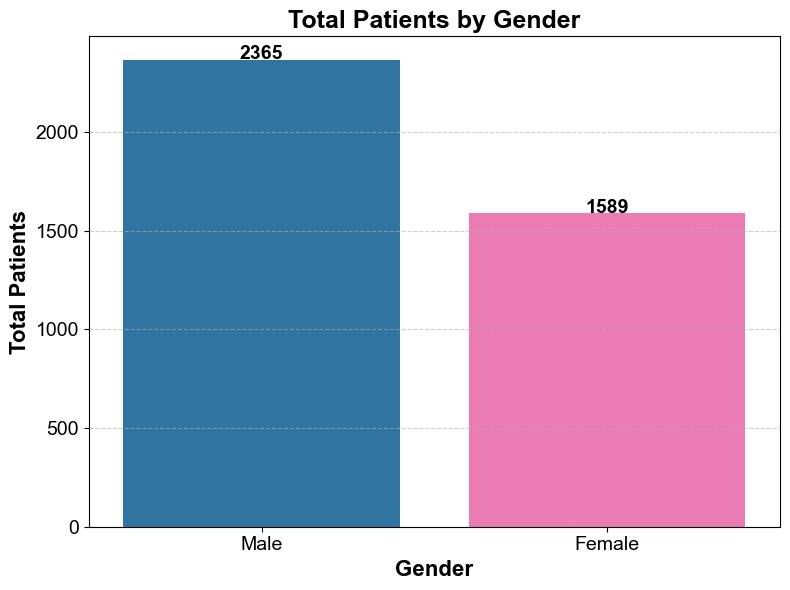

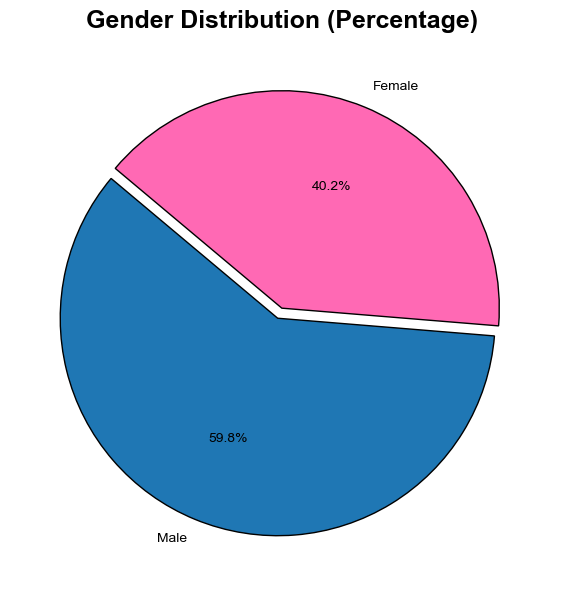

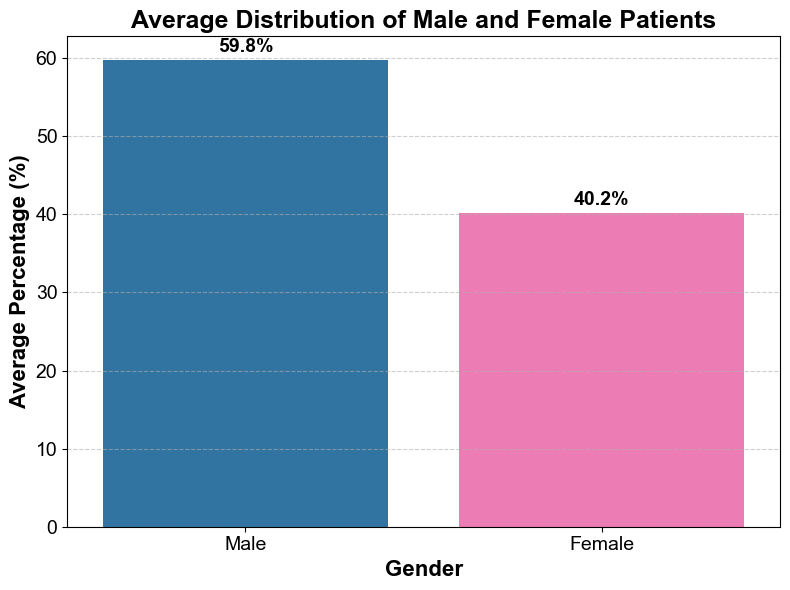


Gender Statistics Summary:
   Gender  Count  Percentage
0    Male   2365   59.812848
1  Female   1589   40.187152


In [6]:
# עדכון מספר 1
# סטטיסטיקה למגדר- רן 


# קביעת פונטים באנגלית
plt.rcParams['font.family'] = 'Arial'

# קריאה לקובץ האקסל
df = pd.read_excel(input_file)

# הסרת כפילויות לפי "מספר מטופל רנדומלי"
df_unique = df.drop_duplicates(subset='מספר מטופל רנדומלי')

# חישוב התפלגות מגדרית (0 = זכר, 1 = נקבה)
gender_counts = df_unique['נקבה'].value_counts()
total_patients = gender_counts.sum()

gender_percentages = (gender_counts / total_patients) * 100

# יצירת תיקייה לשמירת הגרפים
output_dir = os.path.join(project_root, "Statistics_Updates", "Update 1-Gender Statistics")
os.makedirs(output_dir, exist_ok=True)

# צבעים אחידים למגדרים
colors = ['#1f77b4', '#ff69b4']  # כחול לזכר, ורוד לנקבה

# 1️⃣ גרף עמודות - סך המטופלים לפי מגדר
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=['Male', 'Female'], y=gender_counts.values, hue=['Male', 'Female'], palette=colors, legend=False)
for i, v in enumerate(gender_counts.values):
    plt.text(i, v + 2, str(v), ha='center', fontsize=14, color='black', fontweight='bold')

plt.title('Total Patients by Gender', fontsize=18, fontweight='bold')
plt.xlabel('Gender', fontsize=16, fontweight='bold')
plt.ylabel('Total Patients', fontsize=16, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)

output_file = os.path.join(output_dir, "gender_distribution_total_patients.png")
plt.tight_layout()
plt.savefig(output_file, format='png')
plt.show()

# 2️⃣ גרף עוגה - אחוזי התפלגות מגדרית
plt.figure(figsize=(6, 6))
explode = (0.05, 0)  # הדגשה קלה
plt.pie(gender_counts.values, labels=['Male', 'Female'], autopct='%1.1f%%',
        colors=colors, startangle=140, explode=explode, wedgeprops={'edgecolor': 'black'})

plt.title('Gender Distribution (Percentage)', fontsize=18, fontweight='bold')

output_file_pie = os.path.join(output_dir, "gender_distribution_percentage.png")
plt.tight_layout()
plt.savefig(output_file_pie, format='png')
plt.show()

# 3️⃣ גרף עמודות - ממוצע אחוזי מטופלים לפי מגדר
avg_male = (gender_counts[0] / total_patients) * 100
avg_female = (gender_counts[1] / total_patients) * 100

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=['Male', 'Female'], y=[avg_male, avg_female], hue=['Male', 'Female'], palette=colors, legend=False)

for i, v in enumerate([avg_male, avg_female]):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center', fontsize=14, color='black', fontweight='bold')

plt.title('Average Distribution of Male and Female Patients', fontsize=18, fontweight='bold')
plt.xlabel('Gender', fontsize=16, fontweight='bold')
plt.ylabel('Average Percentage (%)', fontsize=16, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)

output_file_avg = os.path.join(output_dir, "gender_average_distribution.png")
plt.tight_layout()
plt.savefig(output_file_avg, format='png')
plt.show()

# 4️⃣ יצירת טבלת סטטיסטיקה להדפסה
gender_summary = pd.DataFrame({
    'Gender': ['Male', 'Female'],
    'Count': gender_counts.values,
    'Percentage': gender_percentages.values
})

print("\nGender Statistics Summary:")
print(gender_summary)


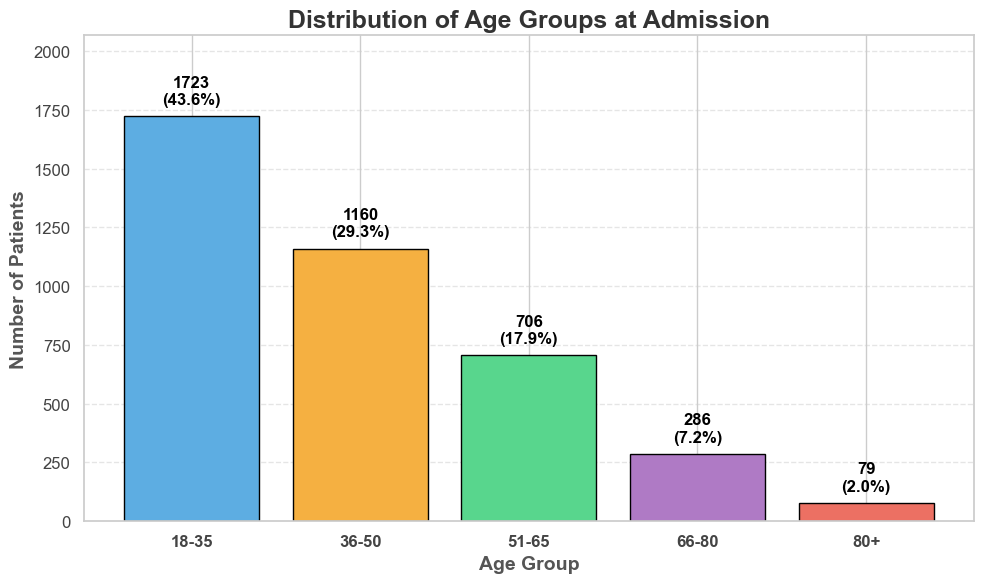

גרף נשמר בהצלחה: Statistics_Updates\Update 2 - Hospitalization Age Statistics\age_group_distribution_bar_chart.png


In [32]:
# עדכון מספר 2
# סטטיסטיקה לגיל אשפוז

# קריאה לקובץ אקסל
df = pd.read_excel(input_file)

# הסרת כפילויות לפי "מספר מטופל רנדומלי"
df_unique = df.drop_duplicates(subset='מספר מטופל רנדומלי')

# יצירת קטגוריות גיל עם טווחים הגיוניים יותר (מגיל 18 ומעלה)
age_bins = [18, 35, 50, 65, 80, 100]
age_labels = ['18-35', '36-50', '51-65', '66-80', '80+']
df_unique = df_unique.copy()  # יצירת עותק לפני שינוי הנתונים
df_unique['Age Group'] = pd.cut(df_unique['גיל אשפוז'], bins=age_bins, labels=age_labels, right=False)

# חישוב שכיחויות בקבוצות הגיל
age_group_counts = df_unique['Age Group'].value_counts().sort_index()

# חישוב אחוזים
total_patients = age_group_counts.sum()
age_group_percentages = (age_group_counts / total_patients) * 100

# יצירת התיקייה לשמירת הגרף
output_dir = os.path.join("Statistics_Updates", "Update 2 - Hospitalization Age Statistics")
os.makedirs(output_dir, exist_ok=True)

# צבעים עדינים ונעימים לעין
age_colors = ['#5DADE2', '#F5B041', '#58D68D', '#AF7AC5', '#EC7063']

# יצירת גרף עמודות עם צבעים ברורים ונעימים
plt.figure(figsize=(10, 6))
bars = plt.bar(age_group_counts.index, age_group_counts.values, color=age_colors, edgecolor='black')

# הגדלת הטווח העליון כדי למנוע חיתוך טקסט
plt.ylim(0, max(age_group_counts.values) * 1.2)

# הוספת מספרים ואחוזים מעל כל עמודה
for bar, count, percent in zip(bars, age_group_counts.values, age_group_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + max(age_group_counts.values) * 0.03,
             f"{count}\n({percent:.1f}%)", ha='center', fontsize=12, fontweight='bold', color='black')

# הוספת כותרות ותוויות
plt.title('Distribution of Age Groups at Admission', fontsize=18, fontweight='bold', color='#333333')
plt.xlabel('Age Group', fontsize=14, fontweight='bold', color='#555555')
plt.ylabel('Number of Patients', fontsize=14, fontweight='bold', color='#555555')

# הוספת קווי רשת עדינים
plt.grid(axis='y', linestyle='--', alpha=0.5)

# שיפור התצוגה של התוויות
plt.xticks(fontsize=12, fontweight='bold', color='#444444')
plt.yticks(fontsize=12, color='#444444')

# שמירת הגרף
output_file_bar = os.path.join(output_dir, "age_group_distribution_bar_chart.png")
plt.tight_layout()
plt.savefig(output_file_bar, format='png', dpi=300)

# הצגת הגרף
plt.show()

print(f"גרף נשמר בהצלחה: {output_file_bar}")





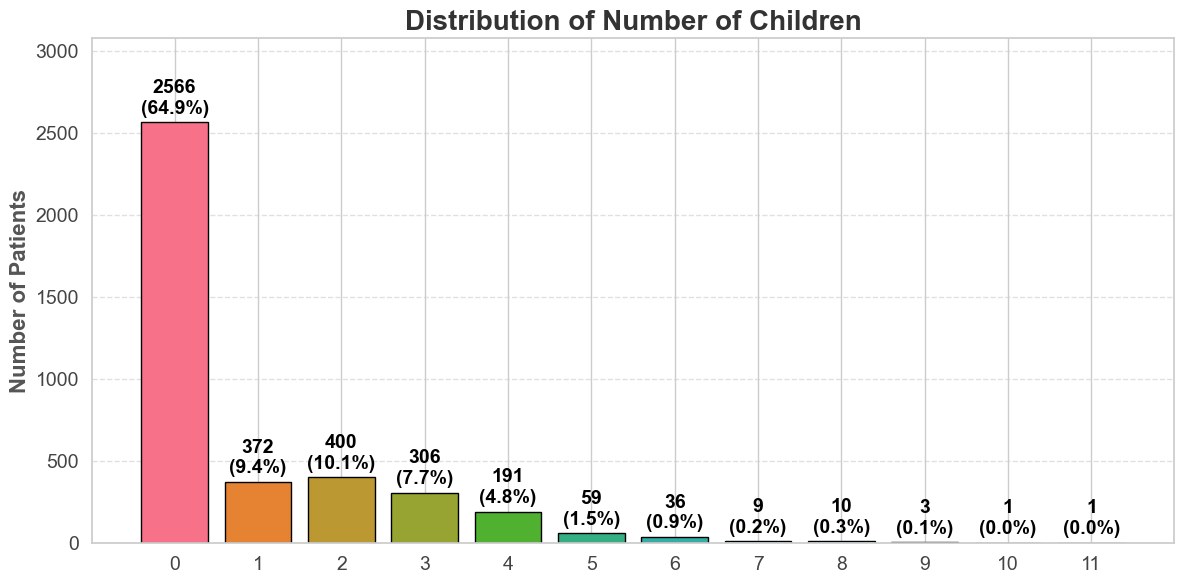

In [21]:
# עדכון סטטסיטיקה מספר 3
# סטטסיטיקה למספר ילדים -רן
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# קביעת פונטים וסגנון
plt.rcParams['font.family'] = 'Arial'
sns.set_theme(style="whitegrid")

# קריאה לקובץ אקסל
df = pd.read_excel(input_file)

# הסרת כפילויות לפי "מספר מטופל רנדומלי"
df_unique = df.drop_duplicates(subset='מספר מטופל רנדומלי')

# ספירת כמות מופעים של כל מספר ילדים
children_counts = df_unique['מספר ילדים'].value_counts().sort_index()
total_count = children_counts.sum()  # סך הכל מקרים

# יצירת תיקיית פלט
output_dir = os.path.join("Statistics_Updates", "Update 3-Statistics for the number of children")
os.makedirs(output_dir, exist_ok=True)

# צבעים שונים לכל עמודה
colors = sns.color_palette("husl", len(children_counts))

# יצירת גרף עמודות
plt.figure(figsize=(12, 6))
bars = plt.bar(children_counts.index, children_counts.values, color=colors, edgecolor='black')

# קביעת גבול עליון לציר ה-Y כדי למנוע חפיפת טקסטים
plt.ylim(0, max(children_counts.values) * 1.2)

# הוספת מספרים ואחוזים לכל עמודה בעיצוב ברור יותר
for bar, count in zip(bars, children_counts.values):
    percentage = (count / total_count) * 100
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(children_counts.values) * 0.02, 
             f"{count}\n({percentage:.1f}%)", 
             ha='center', fontsize=14, fontweight='bold', color='black')

# כותרות באנגלית מעוצבות וברורות
plt.title('Distribution of Number of Children', fontsize=20, fontweight='bold', color='#333333')
# הצגת כל המספרים בציר ה-X
plt.xticks(children_counts.index, fontsize=14, color='#444444')
plt.ylabel('Number of Patients', fontsize=16, fontweight='bold', color='#555555')

# התאמת הפונטים בצירים
plt.xticks(fontsize=14, color='#444444')
plt.yticks(fontsize=14, color='#444444')

# הוספת רשת קלה לרקע
plt.grid(axis='y', linestyle='--', alpha=0.6)

# שמירת הגרף
output_file_bar = os.path.join(output_dir, "children_distribution_bar_chart.png")
plt.tight_layout()
plt.savefig(output_file_bar, format='png', dpi=300)

# הצגת הגרף
plt.show()


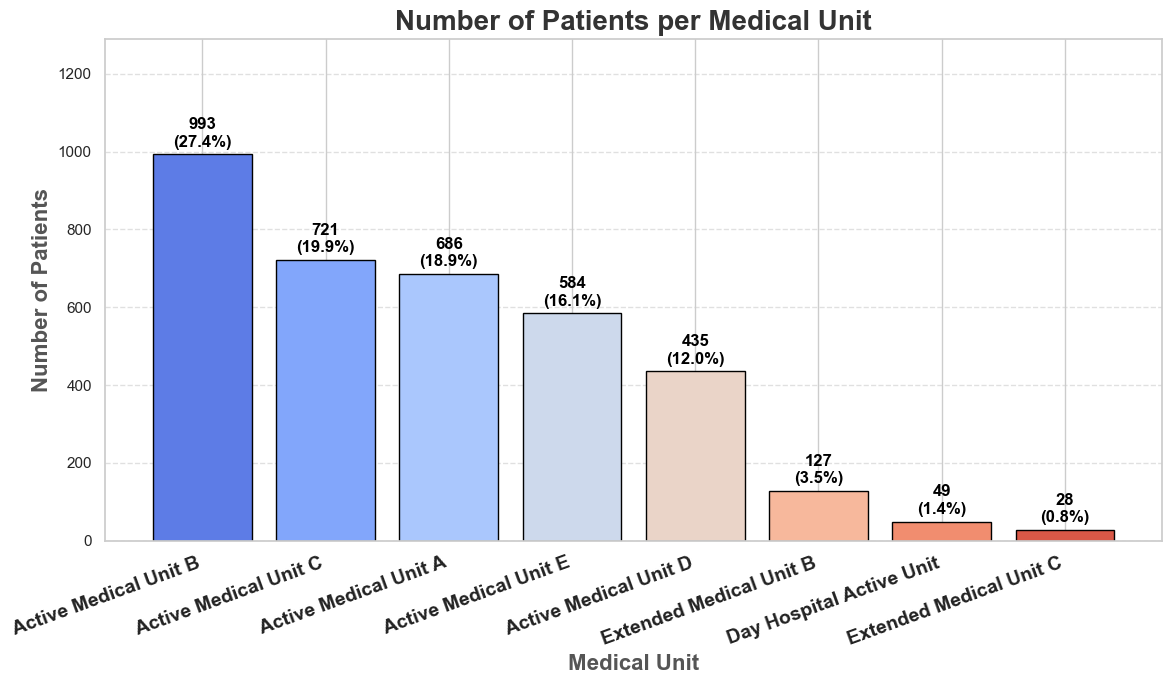

גרף נשמר בהצלחה: Statistics_Updates\Update 4-Medical Units Analysis\patients_comparison_sorted.png


In [27]:
# עדכון מספר 4
# -סטטיסטיקה למחלקות רן

# קריאת קובץ Excel
df = pd.read_excel(input_file)

# הסרת כפילויות לפי "מספר מטופל רנדומלי"
df = df.drop_duplicates(subset='מספר מטופל רנדומלי')

# תרגום שמות המחלקות מעברית לאנגלית
columns_translation = {
    'יחידה רפואית_רפואית ממושכת ב': 'Extended Medical Unit B',
    'יחידה רפואית_רפואית ממושכת ג': 'Extended Medical Unit C',
    'יחידה רפואית_רפואית פעילה א': 'Active Medical Unit A',
    'יחידה רפואית_רפואית פעילה אשפוז יום': 'Day Hospital Active Unit',
    'יחידה רפואית_רפואית פעילה ב': 'Active Medical Unit B',
    'יחידה רפואית_רפואית פעילה ג': 'Active Medical Unit C',
    'יחידה רפואית_רפואית פעילה ד': 'Active Medical Unit D',
    'יחידה רפואית_רפואית פעילה ה': 'Active Medical Unit E'
}

df = df.rename(columns=columns_translation)

# רשימת שמות המחלקות באנגלית
medical_units_english = list(columns_translation.values())

# צבעים נעימים וברורים יותר
colors = sns.color_palette("coolwarm", len(medical_units_english))

# ספירת מספר המטופלים (סכימת 1ים בכל עמודה)
patients_per_unit = df[medical_units_english].sum()

# מיון מהגדול לקטן
patients_per_unit = patients_per_unit.sort_values(ascending=False)

# חישוב אחוזים מכלל המטופלים
total_patients = patients_per_unit.sum()
percentages = (patients_per_unit / total_patients) * 100

# יצירת תיקיית שמירה
output_dir = os.path.join("Statistics_Updates", "Update 4-Medical Units Analysis")
os.makedirs(output_dir, exist_ok=True)

# יצירת גרף השוואתי לכל המחלקות
plt.figure(figsize=(12, 7))
bars = plt.bar(patients_per_unit.index, patients_per_unit.values, color=colors, edgecolor='black')

# הגדלת הטווח העליון כדי למנוע חיתוך של המספרים
plt.ylim(0, max(patients_per_unit.values) * 1.3)

# הוספת מספרים ואחוזים לכל עמודה
for bar, count, percent in zip(bars, patients_per_unit.values, percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + max(patients_per_unit.values) * 0.02,
             f"{count}\n({percent:.1f}%)", ha='center', fontsize=12, fontweight='bold', color='black')

# כותרות מעוצבות וברורות
plt.title('Number of Patients per Medical Unit', fontsize=20, fontweight='bold', color='#333333')
plt.xlabel('Medical Unit', fontsize=16, fontweight='bold', color='#555555')
plt.ylabel('Number of Patients', fontsize=16, fontweight='bold', color='#555555')

# סידור התוויות בציר ה-X כדי שלא יחרגו מהגרף + הדגשה
plt.xticks(rotation=20, fontsize=14, fontweight='bold', ha='right', color='#222222')

# הוספת רשת רקע קלה
plt.grid(axis='y', linestyle='--', alpha=0.6)

# שמירת הגרף
output_file = os.path.join(output_dir, 'patients_comparison_sorted.png')
plt.tight_layout()
plt.savefig(output_file, format='png', dpi=300)
plt.show()

print(f"גרף נשמר בהצלחה: {output_file}")





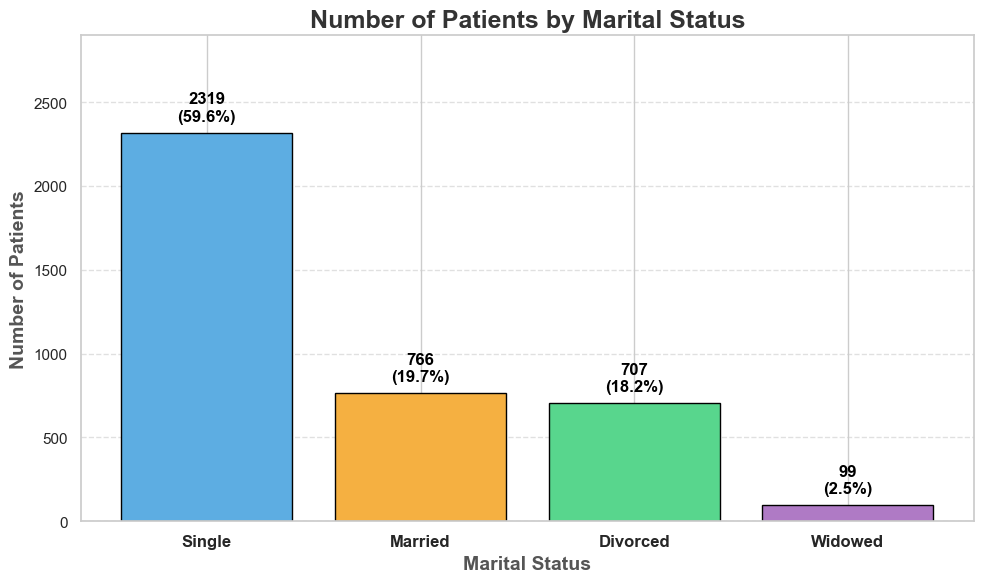

גרף נשמר בהצלחה: Statistics_Updates\Update 5 - Marital Status Analysis\marital_status_comparison.png


In [30]:
# עדכון מספר 5 סטטיסטיקה
# סטטיסטיקה מצב משפחתי- רן

# קריאת קובץ Excel
df = pd.read_excel(input_file)

# הסרת כפילויות לפי מספר מטופל רנדומלי
df = df.drop_duplicates(subset='מספר מטופל רנדומלי')

# תרגום שמות עמודות מעברית לאנגלית
columns_translation = {
    'מצב משפחתי_אלמן/ה': 'Widowed',
    'מצב משפחתי_גרוש/ה': 'Divorced',
    'מצב משפחתי_נשוי/א': 'Married',
    'מצב משפחתי_רווק/ה': 'Single'
}

df = df.rename(columns=columns_translation)

# רשימת מצבי משפחה (ללא "Unknown")
marital_status_columns = list(columns_translation.values())

# ספירת מספר המטופלים בכל מצב משפחתי
status_counts = df[marital_status_columns].sum()

# מיון מהגדול לקטן
status_counts = status_counts.sort_values(ascending=False)

# חישוב אחוזים
status_percentage = (status_counts / status_counts.sum()) * 100

# הגדרת תיקיית שמירה
output_dir = os.path.join("Statistics_Updates", "Update 5 - Marital Status Analysis")
os.makedirs(output_dir, exist_ok=True)

# צבעים נעימים יותר לגרף
colors = ["#5DADE2", "#F5B041", "#58D68D", "#AF7AC5"]  # גוונים עדינים של כחול, כתום, ירוק וסגול

# יצירת גרף השוואתי
plt.figure(figsize=(10, 6))
bars = plt.bar(status_counts.index, status_counts.values, color=colors, edgecolor='black')

# הגדלת הטווח כדי למנוע חיתוך של המספרים
plt.ylim(0, max(status_counts.values) * 1.25)

# הוספת מספרים ואחוזים על כל עמודה
for bar, count, percent in zip(bars, status_counts.values, status_percentage):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + max(status_counts.values) * 0.03,
             f"{count}\n({percent:.1f}%)", ha='center', fontsize=12, fontweight='bold', color='black')

# עיצוב הכותרות והתוויות
plt.title('Number of Patients by Marital Status', fontsize=18, fontweight='bold', color='#333333')
plt.xlabel('Marital Status', fontsize=14, fontweight='bold', color='#555555')
plt.ylabel('Number of Patients', fontsize=14, fontweight='bold', color='#555555')

# עיצוב שמות המצבים בציר ה-X
plt.xticks(rotation=0, fontsize=12, fontweight='bold')

# הוספת רשת קלה
plt.grid(axis='y', linestyle='--', alpha=0.6)

# שמירת הגרף
output_file = os.path.join(output_dir, 'marital_status_comparison.png')
plt.tight_layout()
plt.savefig(output_file, format='png', dpi=300)
plt.show()

print(f"גרף נשמר בהצלחה: {output_file}")




In [66]:
# עדכון 6
# סטטסיטיקה לגורם מפנה-רן


# שם תיקיית השמירה החדש
output_dir = os.path.join("Statistics_Updates", "Update 6-Referral Category Analysis")

# קריאת הקובץ לעורך DataFrame
df = pd.read_excel(input_file)

# הורדת כפילויות על פי 'מספר מטופל רנדומלי'
df = df.drop_duplicates(subset='מספר מטופל רנדומלי')

# אם התיקייה לא קיימת, ניצור אותה
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# המרת שם העמודה 'גורם מפנה' באנגלית
df = df.rename(columns={
    'קטגוריית גורם מפנה_בית חולים': 'Hospital Referral',
    'קטגוריית גורם מפנה_גורמי משפט וביטחון': 'Legal and Security Referral',
    'קטגוריית גורם מפנה_גורמים עצמיים/פרטיים': 'Private Factors',
    'קטגוריית גורם מפנה_גורמים ציבוריים ושירותי רווחה': 'Public and Welfare Services',
    'קטגוריית גורם מפנה_גורמים רפואיים אחרים': 'Other Medical Factors',
    'קטגוריית גורם מפנה_מוסד רפואי אחר': 'Other Medical Institutions',
    'קטגוריית גורם מפנה_פניה עצמית': 'Self Referral',
    'קטגוריית גורם מפנה_פסיכיאטר מחוזי': 'District Psychiatrist Referral',
    'קטגוריית גורם מפנה_קופות חולים': 'Health Fund Referral'
})

# סינון שורות בהן יש ערך 'NaN' בגורם הפנייה (למנוע חישוב שגוי)
df_referral = df.dropna(subset=[col for col in df.columns if 'גורם מפנה' in col])

# סיכום כמות המטופלים עבור כל קטגוריה (כוללים רק את הערכים 1)
referral_counts = df_referral[[
    'Hospital Referral', 'Legal and Security Referral', 'Private Factors',
    'Public and Welfare Services', 'Other Medical Factors',
    'Other Medical Institutions', 'Self Referral', 'District Psychiatrist Referral', 'Health Fund Referral'
]].sum(axis=0)

# חישוב אחוזים
total_patients = referral_counts.sum()
referral_percentages = (referral_counts / total_patients) * 100

# סדר את הגרף מהגדול לקטן
referral_counts = referral_counts.sort_values(ascending=False)
referral_percentages = referral_percentages[referral_counts.index]

# צבעים נעימים לעין מתוך המפה Paired
colors = plt.cm.Paired.colors[:len(referral_counts)]

# גרף Bar Plot להתפלגות גורמי הפנייה עם צבעים נעימים
plt.figure(figsize=(16, 10))  # הגדלת הגודל של הגרף
referral_counts.plot(kind='bar', color=colors, edgecolor='black', width=0.8)  # הגדרת רוחב העמודות

# הוספת תוויות וגריד
plt.title('Referral Source Distribution', fontsize=22, fontweight='bold')  # כותרת גדולה וברורה
plt.xlabel('Referral Category', fontsize=18, fontweight='bold')
plt.ylabel('Number of Patients', fontsize=18, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=16)  # סיבוב הכיתוב בצורה ברורה יותר
plt.yticks(fontsize=16)
plt.grid(True, axis='y', linestyle='--', alpha=0.6)


# הוספת הערכים על כל בר בגרף (כמות המטופלים מעל האחוז עם מרווח תקין)
for i, (count, percentage) in enumerate(zip(referral_counts, referral_percentages)):
    plt.text(i, count + 40, f'{int(count)}', ha='center', fontsize=14, color='black', fontweight='bold')
    plt.text(i, count + 5, f'({percentage:.1f}%)', ha='center', fontsize=12, color='black', fontweight='bold')



# שמירה בתיקייה
output_file_bar_plot = os.path.join(output_dir, 'referral_distribution.png')
plt.tight_layout()  # מבטיח שהתוויות לא יצאו החוצה
plt.savefig(output_file_bar_plot)
plt.close() 

In [38]:
# סטטיסטיקה להופנה ל

# שם תיקיית השמירה החדש
output_dir = os.path.join('Statistics_Updates', 'Update 8-Referral Categories Analysis')

# אם התיקייה לא קיימת, ניצור אותה
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# המרת שמות עמודות לעברית לאנגלית עבור גורם מפנה
referral_columns_translation = {
    'קטגוריית הופנה ל_אחרים': 'Other Referrals',
    'קטגוריית הופנה ל_אשפוז': 'Hospital Referral',
    'קטגוריית הופנה ל_גורמים משפטיים': 'Legal Referral',
    'קטגוריית הופנה ל_טיפול': 'Treatment Referral',
    'קטגוריית הופנה ל_טיפול מרפאתי': 'Outpatient Treatment Referral',
    'קטגוריית הופנה ל_מוסדות': 'Institutional Referral',
    'קטגוריית הופנה ל_מרפאה פסיכיאטרית': 'Psychiatric Clinic Referral',
    'קטגוריית הופנה ל_קהילה ורווחה': 'Community & Welfare Referral',
    'קטגוריית הופנה ל_רופא מטפל': 'Attending Doctor Referral',
    'קטגוריית הופנה ל_ריק': 'Empty Referral'
}

# שינוי שם העמודות של גורם מפנה
df = df.rename(columns=referral_columns_translation)
# הסרת כפילויות על פי מספר מטופל רנדומלי
df = df.drop_duplicates(subset='מספר מטופל רנדומלי')
# עמודות הגורמים המפנים באנגלית עם שמות מובנים
referral_columns = [
    'Other Referrals', 
    'Hospital Referral', 
    'Legal Referral',
    'Treatment Referral', 
    'Outpatient Treatment Referral', 
    'Institutional Referral', 
    'Psychiatric Clinic Referral', 
    'Community & Welfare Referral',
    'Attending Doctor Referral', 
    'Empty Referral'
]

# צבעים שונים לכל גורם מפנה
referral_colors = {
    'Other Referrals': 'lightblue',
    'Hospital Referral': 'lightgreen',
    'Legal Referral': 'lightpink',
    'Treatment Referral': 'lightyellow',
    'Outpatient Treatment Referral': 'lightcyan',
    'Institutional Referral': 'lightcoral',
    'Psychiatric Clinic Referral': 'lightseagreen',
    'Community & Welfare Referral': 'lightsteelblue',
    'Attending Doctor Referral': 'lightgoldenrodyellow',
    'Empty Referral': 'lightgray'
}

# ספירת מספר המטופלים (ספירת 1ים) בכל עמודה של גורם מפנה
referral_counts = df[referral_columns].sum()

# חישוב אחוזים עבור כל גורם מפנה
referral_percentage = (referral_counts / referral_counts.sum()) * 100

# יצירת גרפים עבור כל קטגוריה
for referral in referral_columns:
    plt.figure(figsize=(8, 6))  # הגדלת הגרף
    ax = df[referral].value_counts().plot(kind='bar', color=referral_colors[referral], title=f'Patients Referral: {referral}')
    plt.xlabel('Referral (1 = Present, 0 = Absent)', fontsize=16, fontweight='bold')  # הגדלת הפונט
    plt.ylabel('Number of Patients', fontsize=16, fontweight='bold')  # הגדלת הפונט
    plt.xticks(rotation=0, fontsize=14)
    plt.title(f'Patients Referral: {referral}', fontsize=18, fontweight='bold')
    
    # הוספת כמות מטופלים מעל כל עמודה
    for i in ax.patches:
        ax.annotate(f'{i.get_height()}', (i.get_x() + i.get_width() / 2, i.get_height()), 
                    ha='center', va='center', fontsize=14, color='black', xytext=(0, 5), textcoords='offset points')

    # שמירה בתיקייה
    output_file = os.path.join(output_dir, f'{referral.replace(" ", "_")}_patients.png')
    plt.tight_layout()
    plt.savefig(output_file)
    plt.close()

# גרף השוואתי עבור כל הגורמים המפנים
plt.figure(figsize=(12, 8))  # הגדלת הגרף
ax = referral_counts.plot(kind='bar', color=[referral_colors[referral] for referral in referral_columns])
plt.title('Number of Patients by Referral Category', fontsize=18, fontweight='bold')  # הגדלת הפונט
plt.xlabel('Referral Category', fontsize=16, fontweight='bold')  # הגדלת הפונט
plt.ylabel('Number of Patients', fontsize=16, fontweight='bold')  # הגדלת הפונט
plt.xticks(range(len(referral_columns)), referral_columns, rotation=45, ha='right', fontsize=14)  # הגדלת הפונט

# הוספת כמות מטופלים על כל עמודת בר
for i in ax.patches:
    ax.annotate(f'{i.get_height()}', (i.get_x() + i.get_width() / 2, i.get_height()), 
                ha='center', va='center', fontsize=14, color='black', xytext=(0, 5), textcoords='offset points')

# שמירה בתיקייה
output_file_comparison = os.path.join(output_dir, 'referral_category_comparison.png')
plt.tight_layout()
plt.savefig(output_file_comparison)
plt.close()

# גרף אחוזים עבור כל גורם מפנה כגרף פאי (דונאט)
plt.figure(figsize=(14, 14))  # הגדלת הגרף עוד יותר

ax = plt.gca()

# יצירת גרף דונאט עם אחוזים וכמויות
wedges, texts, autotexts = ax.pie(referral_percentage, 
                                  labels=referral_columns, 
                                  autopct='%1.1f%%\n(%1.0f)', 
                                  startangle=90, 
                                  colors=[referral_colors[referral] for referral in referral_columns],
                                  wedgeprops=dict(width=0.4))

# עיצוב טקסטים
for text in texts + autotexts:
    text.set_fontsize(16)  # גודל פונט גדול יותר
    text.set_fontweight('bold')
    text.set_position((0, 0))  # מיקום טקסט ברור יותר במרכז החלקים

# שיפור מיקום השמות
plt.setp(texts, ha='center', fontsize=14, fontweight='bold')  # היישור למרכז והגדלת הפונט
plt.setp(autotexts, ha='center', fontsize=14, fontweight='bold')

# הוספת כותרת לגרף
plt.title('Percentage and Count of Patients by Referral Category', fontsize=18, fontweight='bold')

# שמירה בתיקייה
output_file_percentage_comparison = os.path.join(output_dir, 'referral_category_percentage_comparison_donut.png')
plt.tight_layout()
plt.savefig(output_file_percentage_comparison)
plt.close()

print(f"גרפים נשמרו בהצלחה בתיקייה: {output_dir}")


ValueError: Grouper for 'Hospital Referral' not 1-dimensional

<Figure size 800x600 with 0 Axes>

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# שם תיקיית השמירה החדש
output_dir = os.path.join('Statistics_Updates', 'Update 9-Legal Status Analysis')

# קריאת הקובץ לעורך DataFrame
df = pd.read_excel(input_file)

# הורדת כפילויות
df = df.drop_duplicates(subset='מספר מטופל רנדומלי')

# אם התיקייה לא קיימת, ניצור אותה
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# המרת שמות עמודות לעברית לאנגלית עבור סטטוס חוקי
status_columns_translation = {
    'קטגוריית סטטוס חוקי_אשפוז בהסכמה': 'Hospitalization_Agreed',
    'קטגוריית סטטוס חוקי_אשפוז כפוי': 'Hospitalization_Forced',
    'קטגוריית סטטוס חוקי_אשפוז כפוי דחוף': 'Hospitalization_Forced_Urgent',
    'קטגוריית סטטוס חוקי_אשפוז כפוי לא דחוף': 'Hospitalization_Forced_NonUrgent',
    'קטגוריית סטטוס חוקי_גורמים משפטיים': 'Legal_Agencies',
    'קטגוריית סטטוס חוקי_ריק': 'Empty'
}

# שינוי שם העמודות של סטטוס חוקי
df = df.rename(columns=status_columns_translation)

# עמודות הסטטוס החוקי באנגלית עם שמות מובנים
status_columns = list(status_columns_translation.values())

# צבעים שונים לכל סטטוס חוקי
status_colors = {
    'Hospitalization_Agreed': 'lightblue',
    'Hospitalization_Forced': 'lightgreen',
    'Hospitalization_Forced_Urgent': 'lightpink',
    'Hospitalization_Forced_NonUrgent': 'lightyellow',
    'Legal_Agencies': 'lightcoral',
    'Empty': 'lightgray'
}

# ספירת מספר המטופלים (ספירת 1ים) בכל עמודה של סטטוס חוקי
status_counts = df[status_columns].sum()

# חישוב אחוזים עבור כל סטטוס חוקי
status_percentage = (status_counts / status_counts.sum()) * 100

# יצירת גרפים עבור כל קטגוריה
for status in status_columns:
    plt.figure(figsize=(10, 6))  # הגדלת הגרף
    ax = df[status].value_counts().plot(kind='bar', color=status_colors[status], title=f'Status: {status}')
    plt.xlabel('Status (1 = Present, 0 = Absent)', fontsize=12, fontweight='bold')  # פונט קטן יותר
    plt.ylabel('Number of Patients', fontsize=12, fontweight='bold')  # פונט קטן יותר
    plt.xticks(rotation=0, fontsize=10)  # פונט קטן יותר
    plt.title(f'Status: {status}', fontsize=14, fontweight='bold')  # פונט קטן יותר

    # הוספת כמות מטופלים מעל כל עמודה
    for i in ax.patches:
        ax.annotate(f'{i.get_height()}', (i.get_x() + i.get_width() / 2, i.get_height()), 
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

    # שמירה בתיקייה
    output_file = os.path.join(output_dir, f'{status}_patients.png')
    plt.tight_layout()
    plt.savefig(output_file)
    plt.close()

# גרף השוואתי עבור כל הסטטוסים החוקיים
plt.figure(figsize=(14, 8))  # הגדלת הגרף
ax = status_counts.plot(kind='bar', color=[status_colors[status] for status in status_columns])
plt.title('Number of Patients by Legal Status', fontsize=16, fontweight='bold')  # פונט גדול יותר
plt.xlabel('Legal Status', fontsize=14, fontweight='bold')  # פונט קטן יותר
plt.ylabel('Number of Patients', fontsize=14, fontweight='bold')  # פונט קטן יותר
plt.xticks(range(len(status_columns)), status_columns, rotation=45, ha='right', fontsize=12)  # פונט קטן יותר

# הוספת כמות מטופלים על כל עמודת בר
for i in ax.patches:
    ax.annotate(f'{i.get_height()}', (i.get_x() + i.get_width() / 2, i.get_height()), 
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

# שמירה בתיקייה
output_file_comparison = os.path.join(output_dir, 'legal_status_comparison.png')
plt.tight_layout()
plt.savefig(output_file_comparison)
plt.close()

print(f"גרפים נשמרו בהצלחה בתיקייה: {output_dir}")


גרפים נשמרו בהצלחה בתיקייה: Statistics_Updates\Update 9-Legal Status Analysis


In [15]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# שם תיקיית השמירה החדש
output_dir = os.path.join('Statistics_Updates', 'Update 10-Origin Area Analysis')

# קריאת הקובץ לעורך DataFrame
df = pd.read_excel(input_file)

# הורדת כפילויות
df = df.drop_duplicates(subset='מספר מטופל רנדומלי')

# אם התיקייה לא קיימת, ניצור אותה
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# המרת שמות עמודות לעברית לאנגלית עבור אזור מוצא
origin_columns_translation = {
    'אזור מוצא_אפריקה': 'Origin_Africa_Continent',
    'אזור מוצא_אתיופיה': 'Origin_Ethiopia_Country',
    'אזור מוצא_ברית המועצות': 'Origin_Soviet_Union_Historical_Region',
    'אזור מוצא_דרום אמריקה': 'Origin_South_America_Continent',
    'אזור מוצא_ישראל': 'Origin_Israel_Country',
    'אזור מוצא_לא קיים': 'Origin_Unknown',
    'אזור מוצא_מזרח אירופה': 'Origin_Eastern_Europe_Region',
    'אזור מוצא_מזרח רחוק': 'Origin_Far_East_Region',
    'אזור מוצא_מערב אירופה': 'Origin_Western_Europe_Region',
    'אזור מוצא_צפון אמריקה': 'Origin_North_America_Continent',
    'אזור מוצא_צפון אפריקה והמזרח התיכון': 'Origin_North_Africa_Middle_East_Region'
}

# שינוי שם העמודות של אזור מוצא
df = df.rename(columns=origin_columns_translation)

# עמודות האזור מוצא באנגלית עם שמות מובנים
origin_columns = list(origin_columns_translation.values())

# צבעים שונים לכל אזור מוצא
origin_colors = {
    'Origin_Africa_Continent': 'lightblue',
    'Origin_Ethiopia_Country': 'lightgreen',
    'Origin_Soviet_Union_Historical_Region': 'lightcoral',
    'Origin_South_America_Continent': 'lightyellow',
    'Origin_Israel_Country': 'lightgray',
    'Origin_Unknown': 'lightpink',
    'Origin_Eastern_Europe_Region': 'lightgreen',
    'Origin_Far_East_Region': 'lightcyan',
    'Origin_Western_Europe_Region': 'lightgoldenrodyellow',
    'Origin_North_America_Continent': 'lightseagreen',
    'Origin_North_Africa_Middle_East_Region': 'lightsalmon'
}

# ספירת מספר המטופלים (ספירת 1ים) בכל עמודה של אזור מוצא
origin_counts = df[origin_columns].sum()

# חישוב אחוזים עבור כל אזור מוצא
origin_percentage = (origin_counts / origin_counts.sum()) * 100

# יצירת גרפים עבור כל קטגוריה
for origin in origin_columns:
    plt.figure(figsize=(8, 6))  # הגדלת הגרף
    ax = df[origin].value_counts().plot(kind='bar', color=origin_colors[origin], title=f'Number of Patients from {origin.replace("_", " ").title()} Origin Area')
    plt.xlabel(f'{origin.replace("_", " ").title()} Origin Area', fontsize=16, fontweight='bold')
    plt.ylabel('Number of Patients', fontsize=16, fontweight='bold')
    plt.xticks(rotation=0, fontsize=14)
    plt.title(f'Patients Origin Area: {origin.replace("_", " ").title()}', fontsize=18, fontweight='bold')

    # הוספת כמות מטופלים מעל כל עמודה
    for i in ax.patches:
        ax.annotate(f'{i.get_height()}', (i.get_x() + i.get_width() / 2, i.get_height()), 
                    ha='center', va='center', fontsize=14, color='black', xytext=(0, 5), textcoords='offset points')

    # שמירה בתיקייה
    output_file = os.path.join(output_dir, f'{origin}_patients.png')
    plt.tight_layout()
    plt.savefig(output_file)
    plt.close()

# גרף השוואתי עבור כל אזורי המוצא
plt.figure(figsize=(12, 8))  # הגדלת הגרף
ax = origin_counts.plot(kind='bar', color=[origin_colors[origin] for origin in origin_columns])
plt.title(f'Comparison of Number of Patients from Different Origin Areas', fontsize=18, fontweight='bold')
plt.xlabel('Origin Area', fontsize=16, fontweight='bold')
plt.ylabel('Number of Patients', fontsize=16, fontweight='bold')
plt.xticks(range(len(origin_columns)), origin_columns, rotation=45, ha='right', fontsize=14)

# הוספת כמות מטופלים על כל עמודת בר
for i in ax.patches:
    ax.annotate(f'{i.get_height()}', (i.get_x() + i.get_width() / 2, i.get_height()), 
                ha='center', va='center', fontsize=14, color='black', xytext=(0, 5), textcoords='offset points')

# שמירה בתיקייה
output_file_comparison = os.path.join(output_dir, 'origin_area_comparison.png')
plt.tight_layout()
plt.savefig(output_file_comparison)
plt.close()

# גרף אחוזים עבור כל אזור מוצא כגרף פאי
plt.figure(figsize=(10, 8))  # הגדלת הגרף
plt.pie(origin_percentage, labels=origin_columns, colors=[origin_colors[origin] for origin in origin_columns],
        autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14, 'fontweight': 'bold'})
plt.title(f'Percentage Distribution of Patients by Origin Area', fontsize=18, fontweight='bold')

# שמירה בתיקייה
output_file_percentage_comparison_pie = os.path.join(output_dir, 'origin_area_percentage_comparison_pie.png')
plt.tight_layout()
plt.savefig(output_file_percentage_comparison_pie)
plt.close()


In [ ]:
# סטטסטיקה לגיל עלייה

# שם תיקיית השמירה החדש
output_dir = os.path.join('Statistics_Updates', 'Update 11-Age_Analysis')

# קריאת הקובץ לעורך DataFrame
df = pd.read_excel(input_file)

# הורדת כפילויות
df = df.drop_duplicates(subset='מספר מטופל רנדומלי')

# אם התיקייה לא קיימת, ניצור אותה
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# המרת שם העמודה 'גיל עליה' באנגלית
df = df.rename(columns={'גיל עליה': 'Aliyah_Age'})

# סינון שורות בהן יש ערך 'NaN' בעמודת 'Aliyah_Age' (מטופלים שנולדו בארץ)
df_aliyah = df[df['Aliyah_Age'].notna()].copy()

# יצירת טווחי גילאים
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91+']
df_aliyah['Age_Range'] = pd.cut(df_aliyah['Aliyah_Age'], bins=bins, labels=labels, right=False)

# התפלגות טווחי הגילאים
age_range_counts = df_aliyah['Age_Range'].value_counts().sort_index()

# גרף Bar Plot להתפלגות גילאים עם צבעים ברורים
plt.figure(figsize=(10, 6))
age_range_counts.plot(kind='bar', color=plt.cm.Paired.colors[:len(age_range_counts)], edgecolor='black')

# הוספת תוויות וגריד
plt.title('Age Range Distribution of Patients Who Immigrated to Israel', fontsize=18, fontweight='bold')
plt.xlabel('Age Range', fontsize=16, fontweight='bold')
plt.ylabel('Number of Patients', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, axis='y', linestyle='--', alpha=0.6)

# הוספת הערכים על כל בר בגרף
for i, v in enumerate(age_range_counts):
    plt.text(i, v + 1, str(v), ha='center', fontsize=14, color='black')

# שמירה בתיקייה
output_file_bar_plot = os.path.join(output_dir, 'age_range_distribution_aliyah_bar.png')
plt.tight_layout()
plt.savefig(output_file_bar_plot)
plt.close()


In [5]:
import pandas as pd
import os

# --- שלב 1: טען את שני הקבצים בעברית ---
text_path = os.path.join("Excel_Updates", "Update 51 - Merged Text and Features", "merged_text_features_updated.xlsx")
features_path = os.path.join("Excel_Updates", "Update 48 - Month Dummy Comparison", "month_only.xlsx")

df_text = pd.read_excel(text_path)
df_features = pd.read_excel(features_path)

# --- שלב 2: מיזוג לפי שני מזהים ---
merge_keys = ["מספר מטופל רנדומלי", "מספר מקרה אשפוז רנדומלי"]
df_fixed = pd.merge(df_text, df_features, on=merge_keys, how="left", suffixes=('', '_from_features'))

# --- שלב 3: העתקת נתונים חסרים מהעמודות עם "_from_features"
for col in df_features.columns:
    if col in merge_keys:
        continue
    col_from = f"{col}_from_features"
    if col in df_fixed.columns:
        df_fixed[col] = df_fixed[col].fillna(df_fixed[col_from])
        df_fixed.drop(columns=[col_from], inplace=True)
    else:
        df_fixed[col] = df_fixed[col_from]
        df_fixed.drop(columns=[col_from], inplace=True)

# --- שלב 4: שמור את הקובץ עם נתונים מלאים ---
output_path = os.path.join("Excel_Updates", "Update 51 - Merged Text and Features", "merged_text_features_filled.xlsx")
df_fixed.to_excel(output_path, index=False)

print(f"✅ הנתונים הושלמו ונשמרו בהצלחה כאן:\n{output_path}")


✅ הנתונים הושלמו ונשמרו בהצלחה כאן:
Excel_Updates\Update 51 - Merged Text and Features\merged_text_features_filled.xlsx


In [7]:
import pandas as pd
import os

# --- טען את שני הקבצים ---
target_path = os.path.join("Excel_Updates", "Update 52 - English Translation", "merged_text_features_filled_T2.xlsx")
source_path = os.path.join("Excel_Updates", "Update 48 - Month Dummy Comparison", "month_year.xlsx")

df_target = pd.read_excel(target_path)
df_source = pd.read_excel(source_path)

# --- תרגום מזהים מהקובץ המקורי לעברית ---
df_source = df_source.rename(columns={
    "מספר מטופל רנדומלי": "Random patient number",
    "מספר מקרה אשפוז רנדומלי": "Random hospitalization case number"
})

# --- מיזוג לפי מזהים ---
merge_keys = ["Random patient number", "Random hospitalization case number"]
columns_to_update = ["Year_2021", "Year_2022", "Year_2023", "Year_2024"]

df_merged = pd.merge(df_target, df_source[merge_keys + columns_to_update], on=merge_keys, how="left", suffixes=('', '_from_years'))

# --- עדכון ערכים חסרים בלבד ---
for col in columns_to_update:
    df_merged[col] = df_merged[f"{col}_from_years"].fillna(df_merged[col])
    df_merged.drop(columns=[f"{col}_from_years"], inplace=True)

# --- שמירת קובץ חדש עם השלמות ---
output_path = os.path.join("Excel_Updates", "Update 52 - English Translation", "merged_text_features_filled_T3.xlsx")
df_merged.to_excel(output_path, index=False)

print(f"✅ עמודות השנים הושלמו ונשמרו בהצלחה כאן:\n{output_path}")


✅ עמודות השנים הושלמו ונשמרו בהצלחה כאן:
Excel_Updates\Update 52 - English Translation\merged_text_features_filled_T3.xlsx


In [8]:
########################NLP#######################

In [10]:
#התקנת סיפריות
!pip install -U scikit-learn imbalanced-learn


  Using cached scikit_learn-1.6.1-cp313-cp313-win_amd64.whl.metadata (15 kB)
  Using cached imbalanced_learn-0.13.0-py3-none-any.whl.metadata (8.8 kB)
Using cached scikit_learn-1.6.1-cp313-cp313-win_amd64.whl (11.1 MB)
Using cached imbalanced_learn-0.13.0-py3-none-any.whl (238 kB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.12.0
    Uninstalling imbalanced-learn-0.12.0:
      Successfully uninstalled imbalanced-learn-0.12.0



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
conda install -c conda-forge scikit-learn imbalanced-learn



Note: you may need to restart the kernel to use updated packages.Collecting package metadata (current_repodata.json): ...working... done
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\User\anaconda3

  added / updated specs:
    - imbalanced-learn
    - scikit-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2025.4.26  |       h4c7d964_0         149 KB  conda-forge
    certifi-2025.4.26          |     pyhd8ed1ab_0         154 KB  conda-forge
    imbalanced-learn-0.12.2    |     pyhd8ed1ab_0         155 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         458 KB

The following packages will be UPDATED:

  ca-certificates    pkgs/main/win-64::ca-certificates-202~ --> conda-forge/noarch::ca-certificates-2025.4.26-h4c7d964_0 
  certifi  



==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 25.5.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=25.5.0




In [ ]:
pip install scikit-learn==1.3.2 imbalanced-learn==0.11.0 --force-reinstall


In [15]:
# 📌 שלב 1: ייבוא ספריות
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE


import warnings
warnings.filterwarnings("ignore")

# 📌 שלב 2: הגדרות בסיס
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid', palette='pastel')
plt.rcParams['figure.figsize'] = (12, 6)

# 📌 שלב 3: קריאת הקובץ המעודכן ביותר - T3
notebook_path = os.getcwd() 
excel_path = os.path.join(
    notebook_path, "..", 
    "Excel_Updates", 
    "Update 52 - English Translation", 
    "merged_text_features_filled_T3.xlsx"
)

# בדיקה מה יש בגליונות
xls = pd.ExcelFile(excel_path)
print("Available sheets:", xls.sheet_names)

# 📌 שלב 4: טען את הגיליון שתרצה (לדוגמה - גיליון ראשון)
df = pd.read_excel(xls, sheet_name=0)

# תצוגה ראשונית של הנתונים
print("Shape:", df.shape)
df.head()


ImportError: cannot import name '_check_X' from 'imblearn.utils._validation' (C:\Users\User\anaconda3\Lib\site-packages\imblearn\utils\_validation.py)